In [1]:
%%time
dataset_name = "W20_only"
df_list = "BES_Panel"

%matplotlib inline
%run BES_header.py {dataset_name} {df_list}

Toggle code

Wall time: 37.8 s


In [271]:
df = pd.read_stata( "E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W23_comb\\BES2019_W23_Panel_v23.0.dta" )

MemoryError: Unable to allocate 7.87 GiB for an array with shape (9802, 107796) and data type float64

In [276]:
gender = pd.read_stata( "E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W23_comb\\BES2019_W23_Panel_v23.0.dta",columns=['gender'] )

In [274]:
gc.collect()

20

In [3]:
search(df,"gender|alscale")

genderRolesW10     30237
impGenderW14        7801
gender            106229
dtype: int64

In [4]:
search(df,"nuclear|nuke")

nuclearGridW4     7927
keepNukesW4       7927
nuclearGridW7    30895
keepNukesW7      30895
keepNukesW12     34394
keepNukesW23     30949
dtype: int64

In [39]:
search(df,"gender|al_scale|al\dW23|gayEquality")

genderRolesW10        30237
impGenderW14           7801
gayEqualityW15         5109
gayEqualityW16        37959
gayEqualityW17        34366
al1W23                30949
al2W23                30949
al3W23                30949
al4W23                30949
al5W23                30949
gayEqualityW23        30949
gayEqualityW1_W5      41876
gayEqualityW6_W14     63222
al_scaleW1_W5         37890
al_scaleW6            27288
al_scaleW7_W9         35873
al_scaleW10_W12       30088
al_scaleW13           27252
al_scaleW14W15        31629
al_scaleW16           32671
al_scaleW17_W19       29773
al_scaleW20           26914
al_scaleW21           25692
al_scaleW22           23617
al_scaleW23           26399
gender               106229
dtype: int64

In [30]:
df["al_scaleW23"].groupby(df["gender"]).apply(lambda x: x.cat.codes.replace(-1,np.nan).mean()/20)

gender
Male      0.609325
Female    0.619419
Name: al_scaleW23, dtype: float64

In [10]:
df["al_scaleW23"]

0         NaN
1         4.0
2         6.5
3         NaN
4         NaN
         ... 
107791    NaN
107792    NaN
107793    NaN
107794    NaN
107795    NaN
Name: al_scaleW23, Length: 107796, dtype: category
Categories (21, object): ['Libertarian' < 0.5 < 1.0 < 1.5 ... 8.5 < 9.0 < 9.5 < 'Authoritarian']

In [34]:
df[["al1W23","al2W23","al3W23","al5W23"]].apply(lambda x: x.cat.codes.replace(-1,np.nan)/5).mean(axis=1).groupby(df["gender"]).mean()

gender
Male      0.532445
Female    0.529771
dtype: float64

In [37]:
authoritarianism = df["al_scaleW23"].cat.codes.replace(-1,np.nan)/20

In [55]:
gayEquality = df["gayEqualityW23"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
blackEquality = df["blackEqualityW23"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
femaleEquality = df["femaleEqualityW23"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)

In [179]:
het_or_not = df["p_sexualityW23"]=="Heterosexual"
het_or_not[df["p_sexualityW23"].isnull()]=np.nan
het_or_not = het_or_not.replace({1.0:"Heterosexual",0:"Not Heterosexual"})
het_or_not.value_counts(dropna=False)

NaN                 76903
Heterosexual        27207
Not Heterosexual     3686
Name: p_sexualityW23, dtype: int64

In [183]:
whiteBrit_or_not = df["p_ethnicityW23"]=="White British"
whiteBrit_or_not[df["p_ethnicityW23"].isnull()]=np.nan
whiteBrit_or_not = whiteBrit_or_not.replace({1.0:"White British",0.0:"Not White British"})
whiteBrit_or_not.value_counts(dropna=False)

NaN                  78397
White British        26243
Not White British     3156
Name: p_ethnicityW23, dtype: int64

In [186]:
authoritarianism.name = 'authoritarianism'
gayEquality.name = 'gayEquality'
blackEquality.name = 'blackEquality'
femaleEquality.name = 'femaleEquality'
het_or_not.name = 'het_or_not'
whiteBrit_or_not.name = 'whiteBrit_or_not'

In [139]:
g.axes[0,0].set_xlabel('axes label 1')
g.axes[0,1].set_xlabel('axes label 2')

authoritarianism     float64
gender              category
variable              object
value                float64
dtype: object

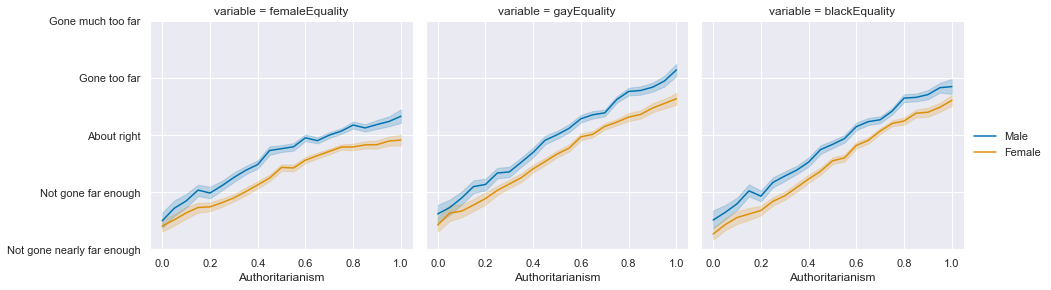

In [184]:
data =pd.concat([authoritarianism,femaleEquality,gayEquality,blackEquality,df["gender"]],axis=1)
data = data.melt(id_vars=["authoritarianism","gender"])

g = sns.FacetGrid(data=data, col="variable",height=4)
g.map_dataframe(sns.lineplot,x="authoritarianism",y="value",hue="gender");
plt.ylim([0,4]);
g.add_legend();
g.axes[0,0].set_xlabel('Authoritarianism');
g.axes[0,1].set_xlabel('Authoritarianism');
g.axes[0,2].set_xlabel('Authoritarianism');
g.set(yticks=[0,1,2,3,4])
g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
                       'About right','Gone too far',
                       'Gone much too far']);

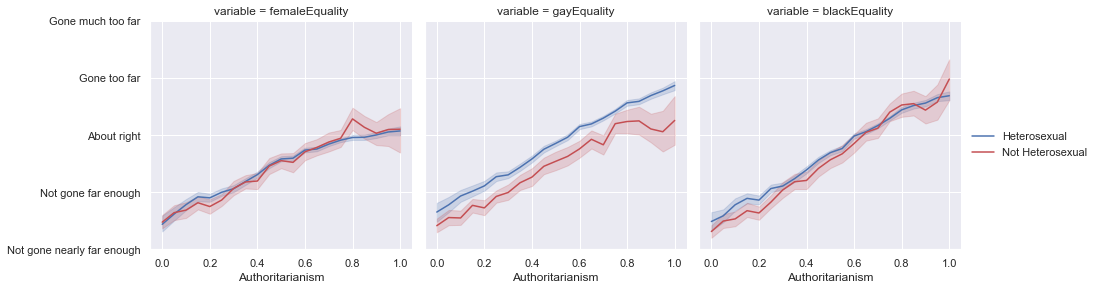

In [188]:
data =pd.concat([authoritarianism,femaleEquality,gayEquality,blackEquality,het_or_not],axis=1)
data = data.melt(id_vars=["authoritarianism","het_or_not"])

g = sns.FacetGrid(data=data, col="variable",height=4)
g.map_dataframe(sns.lineplot,x="authoritarianism",y="value",hue="het_or_not",palette={'Not Heterosexual':'r','Heterosexual':'b'});
plt.ylim([0,4]);
g.add_legend();
g.axes[0,0].set_xlabel('Authoritarianism');
g.axes[0,1].set_xlabel('Authoritarianism');
g.axes[0,2].set_xlabel('Authoritarianism');
g.set(yticks=[0,1,2,3,4])
g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
                       'About right','Gone too far',
                       'Gone much too far']);

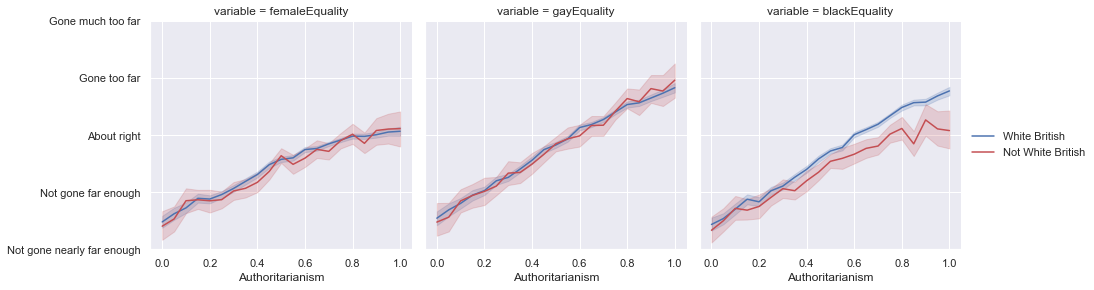

In [190]:
data =pd.concat([authoritarianism,femaleEquality,gayEquality,blackEquality,whiteBrit_or_not],axis=1)
data = data.melt(id_vars=["authoritarianism","whiteBrit_or_not"])

g = sns.FacetGrid(data=data, col="variable",height=4)
g.map_dataframe(sns.lineplot,x="authoritarianism",y="value",hue="whiteBrit_or_not",palette={'Not White British':'r','White British':'b'});
plt.ylim([0,4]);
g.add_legend();
g.axes[0,0].set_xlabel('Authoritarianism');
g.axes[0,1].set_xlabel('Authoritarianism');
g.axes[0,2].set_xlabel('Authoritarianism');
g.set(yticks=[0,1,2,3,4])
g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
                       'About right','Gone too far',
                       'Gone much too far']);

In [ ]:
# what if we mask these last two on gender as well?

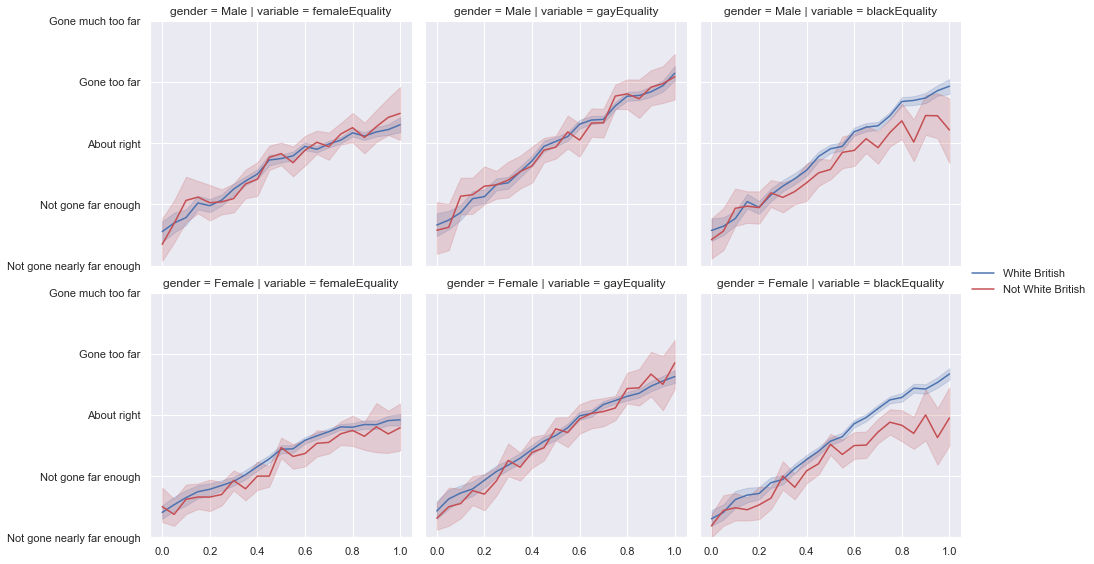

In [191]:
data =pd.concat([authoritarianism,femaleEquality,gayEquality,blackEquality,whiteBrit_or_not,df["gender"]],axis=1)
data = data.melt(id_vars=["authoritarianism","whiteBrit_or_not","gender"])

g = sns.FacetGrid(data=data, col="variable",row="gender",height=4)
g.map_dataframe(sns.lineplot,x="authoritarianism",y="value",hue="whiteBrit_or_not",palette={'Not White British':'r','White British':'b'});
plt.ylim([0,4]);
g.add_legend();
g.axes[0,0].set_xlabel('Authoritarianism');
g.axes[0,1].set_xlabel('Authoritarianism');
g.axes[0,2].set_xlabel('Authoritarianism');
g.set(yticks=[0,1,2,3,4])
g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
                       'About right','Gone too far',
                       'Gone much too far']);

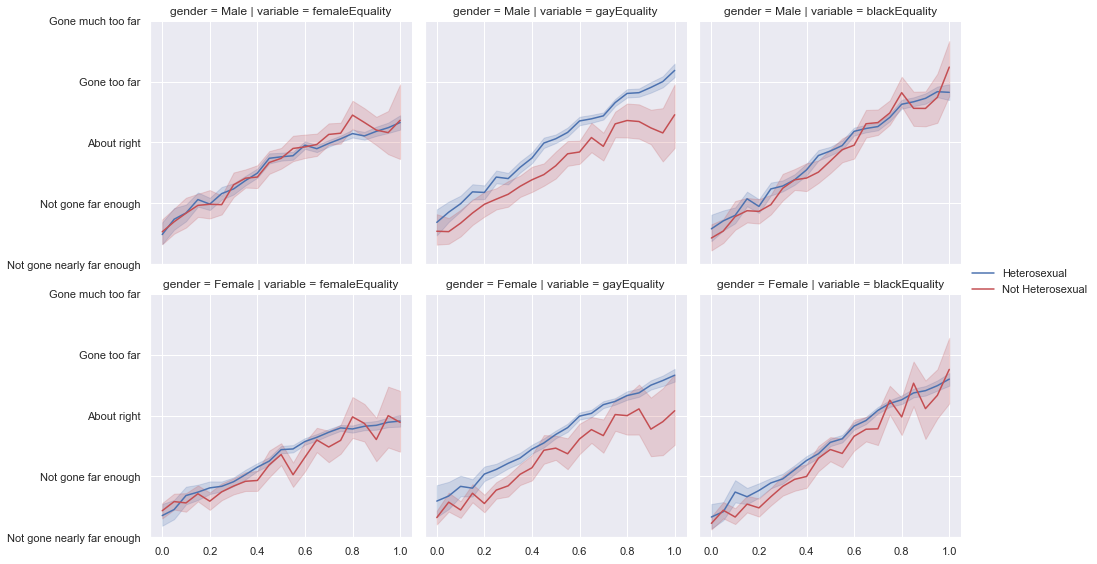

In [192]:
data =pd.concat([authoritarianism,femaleEquality,gayEquality,blackEquality,het_or_not,df["gender"]],axis=1)
data = data.melt(id_vars=["authoritarianism","het_or_not","gender"])

g = sns.FacetGrid(data=data, col="variable",row='gender',height=4)
g.map_dataframe(sns.lineplot,x="authoritarianism",y="value",hue="het_or_not",palette={'Not Heterosexual':'r','Heterosexual':'b'});
plt.ylim([0,4]);
g.add_legend();
g.axes[0,0].set_xlabel('Authoritarianism');
g.axes[0,1].set_xlabel('Authoritarianism');
g.axes[0,2].set_xlabel('Authoritarianism');
g.set(yticks=[0,1,2,3,4])
g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
                       'About right','Gone too far',
                       'Gone much too far']);

In [216]:
authoritarianism_minus_cen = df[["al1W23","al2W23","al3W23","al5W23",]].apply(lambda x: x.cat.codes.replace(-1,np.nan)/5).mean(axis=1).round(2)
authoritarianism_minus_cen.name = 'authoritarianism_minus_cen'

In [204]:
authoritarianism.notnull().sum(),authoritarianism_minus_cen.notnull().sum(),

(26399, 30949)

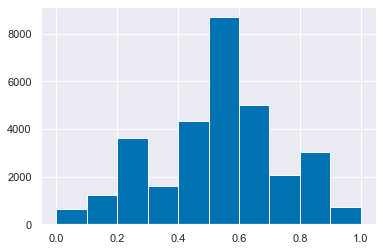

In [217]:
authoritarianism_minus_cen.hist(bins=10)

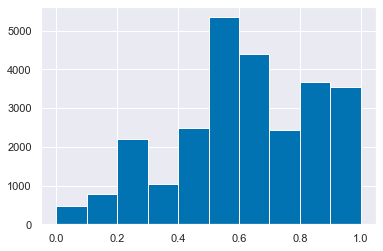

In [218]:
authoritarianism.hist(bins=10)

In [221]:
authoritarianism.value_counts()

0.75    2434
0.70    2285
0.65    2123
0.80    1920
0.60    1878
0.50    1781
0.85    1745
0.55    1689
0.90    1458
0.45    1326
0.40    1163
0.95    1128
0.35    1029
1.00     971
0.30     908
0.25     719
0.20     586
0.15     447
0.10     343
0.00     237
0.05     229
Name: authoritarianism, dtype: int64

In [219]:
authoritarianism_minus_cen.value_counts()

0.60    3417
0.80    2832
0.55    2711
0.70    2585
0.50    2557
0.65    2431
0.40    2236
0.45    2109
0.75    2073
0.35    1588
0.30    1460
0.25    1190
0.20     973
0.15     732
1.00     616
0.10     493
0.05     319
0.00     304
0.85     200
0.90      94
0.95      29
Name: authoritarianism_minus_cen, dtype: int64

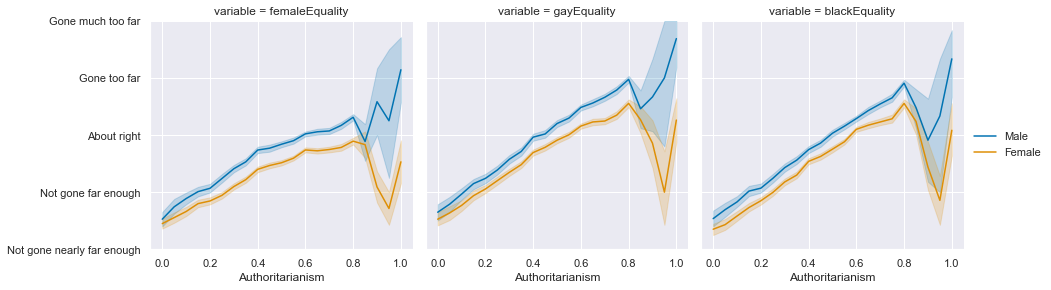

In [220]:
data =pd.concat([authoritarianism_minus_cen,femaleEquality,gayEquality,blackEquality,df["gender"]],axis=1)
data = data.melt(id_vars=["authoritarianism_minus_cen","gender"])

g = sns.FacetGrid(data=data, col="variable",height=4)
g.map_dataframe(sns.lineplot,x="authoritarianism_minus_cen",y="value",hue="gender");
plt.ylim([0,4]);
g.add_legend();
g.axes[0,0].set_xlabel('Authoritarianism');
g.axes[0,1].set_xlabel('Authoritarianism');
g.axes[0,2].set_xlabel('Authoritarianism');
g.set(yticks=[0,1,2,3,4])
g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
                       'About right','Gone too far',
                       'Gone much too far']);

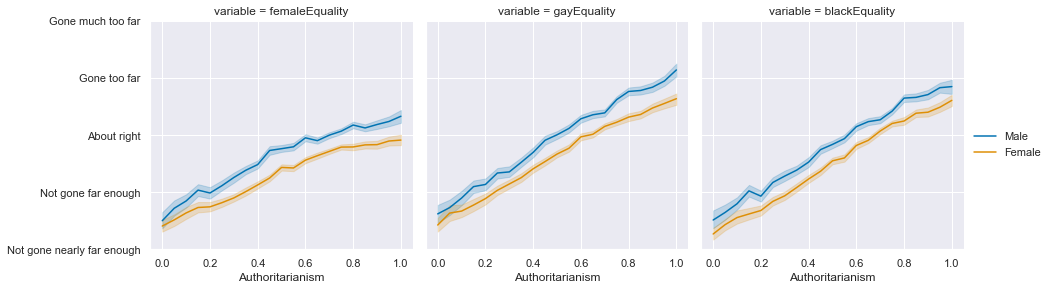

In [222]:
data =pd.concat([authoritarianism,femaleEquality,gayEquality,blackEquality,df["gender"]],axis=1)
data = data.melt(id_vars=["authoritarianism","gender"])

g = sns.FacetGrid(data=data, col="variable",height=4)
g.map_dataframe(sns.lineplot,x="authoritarianism",y="value",hue="gender");
plt.ylim([0,4]);
g.add_legend();
g.axes[0,0].set_xlabel('Authoritarianism');
g.axes[0,1].set_xlabel('Authoritarianism');
g.axes[0,2].set_xlabel('Authoritarianism');
g.set(yticks=[0,1,2,3,4])
g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
                       'About right','Gone too far',
                       'Gone much too far']);

In [ ]:
## where to go from here
# Beg Rosalind Shorrocks for halp!

# try to find gender gaps on other variables that correlate with authoritarianism???

In [223]:
df

id  waves_taken  wave1  wave2  wave3  wave4  wave5  wave6  wave7  \
0       1.0          9.0    1.0    1.0    0.0    1.0    1.0    1.0    1.0   
1       2.0         20.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0   
2       3.0         16.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
3       4.0          2.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0   
4       5.0          2.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0   
...     ...          ...    ...    ...    ...    ...    ...    ...    ...   
107791  NaN          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
107792  NaN          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
107793  NaN          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
107794  NaN          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
107795  NaN          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

        wave8  ...  p_edlevelUniW19  p_edlevelUniW20  p_edlevelUniW21  \
0         1.0  ...              NaN              NaN              NaN   
1         1.0  ...    Undergraduate    Undergraduate    Undergraduate   
2         0.0  ...          A-level              NaN              NaN   
3         0.0  ...              NaN              NaN              NaN   
4         0.0  ...              NaN              NaN              NaN   
...       ...  ...              ...              ...              ...   
107791    NaN  ...              NaN              NaN              NaN   
107792    NaN  ...              NaN              NaN              NaN   
107793    NaN  ...              NaN              NaN              NaN   
107794    NaN  ...              NaN              NaN              NaN   
107795    NaN  ...              NaN              NaN              NaN   

        p_edlevelUniW8  p_edlevelUniW17  p_edlevelUniW18  p_eurefturnout  \
0        Undergraduate              NaN              NaN      Yes, voted   
1        Undergraduate    Undergraduate    Undergraduate      Yes, voted   
2                  NaN              NaN              NaN      Yes, voted   
3                  NaN              NaN              NaN             NaN   
4                  NaN              NaN              NaN             NaN   
...                ...              ...              ...             ...   
107791             NaN              NaN              NaN             NaN   
107792             NaN              NaN              NaN             NaN   
107793             NaN              NaN              NaN             NaN   
107794             NaN              NaN              NaN             NaN   
107795             NaN              NaN              NaN             NaN   

        cogempathyIRTW14  affempathyIRTW14  zeroSumIRTW14  
0                    NaN               NaN            NaN  
1                    NaN               NaN            NaN  
2                    NaN               NaN            NaN  
3                    NaN               NaN            NaN  
4                    NaN               NaN            NaN  
...                  ...               ...            ...  
107791               NaN               NaN            NaN  
107792               NaN               NaN            NaN  
107793               NaN               NaN            NaN  
107794               NaN               NaN            NaN  
107795               NaN               NaN            NaN  

[107796 rows x 9830 columns]

In [2]:
%%time
dataset_name = "W19_comb"
df_list = "BES_Panel|BES_reduced_with_na"

%matplotlib inline
%run BES_header.py {dataset_name} {df_list}

Toggle code

Wall time: 17.4 s


In [3]:
# %%time
# dataset_name = "W19_only"
# df_list = "BES_Panel|BES_reduced_with_na"

# %matplotlib inline
# %run BES_header.py {dataset_name} {df_list}

In [4]:
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

var_type (8079, 14)


In [5]:
# authoritarianism.corr(gayEquality)

In [6]:
BES_reduced_with_na.astype('float')[BES_reduced_with_na["gender_Female"]].mean()-BES_reduced_with_na.astype('float')[~BES_reduced_with_na["gender_Female"]].mean()

turnoutUKGeneral__Very likely that I will vote   -0.092214
partyIdStrength__Not very strong                  0.071216
polAttention__Pay a great deal of attention      -0.843130
pidWeThey__Strongly agree                        -0.158527
pidInterestedOthers__Strongly agree              -0.006465
                                                    ...   
responsibleEconC_2_Yes                           -0.004656
responsibleEconC_1_Yes                           -0.065377
coronaMeasures_2_Yes                              0.044327
coronaMeasures_1_Yes                             -0.002246
coronaMeasures_4_Yes                              0.018628
Length: 742, dtype: float64

In [10]:
#gayEquality[gender]
# gayEquality.groupby(gender["gender"]).mean()
# gap = -.33

In [32]:
search(BES_reduced_with_na,"gay")

p_sexuality_Gay or lesbian    29733
dtype: int64

In [8]:
search(BES_reduced_with_na,"al_scale")

al_scale__Authoritarian    26914
dtype: int64

In [9]:
search(BES_reduced_with_na,"gender")

gender_Female    31468
dtype: int64

In [11]:
corrs = BES_reduced_with_na.astype('float').corrwith(BES_reduced_with_na["al_scale__Authoritarian"])

In [12]:
corrs.sort_values().head(10)

asylumMore__Many more                   -0.642608
immigSelf__Allow many more              -0.595072
immigCultural__Enriches cultural life   -0.550090
immigEcon__Good for economy             -0.525165
familiesMore__Many more                 -0.509567
globalMigration__Mainly good            -0.486567
euMore__Many more                       -0.464038
noneuMore__Many more                    -0.444615
studentsMore__Many more                 -0.440946
ptvGrn__Very likely                     -0.430384
dtype: float64

In [13]:
corrs.sort_values().tail(10)

dealPriorityRedTape__Extremely important    0.582385
al4__Strongly agree                         0.628310
immigrantsWelfareState__Strongly agree      0.634510
govtHandouts__Strongly agree                0.635757
dealPriorityImmig__Extremely important      0.640230
al3__Strongly agree                         0.783903
al2__Strongly agree                         0.790263
al5__Strongly agree                         0.800879
al1__Strongly agree                         0.819360
al_scale__Authoritarian                     1.000000
dtype: float64

In [18]:
gender_gap = BES_reduced_with_na.astype('float')[BES_reduced_with_na["gender_Female"]].mean()-BES_reduced_with_na.astype('float')[~BES_reduced_with_na["gender_Female"]].mean()
gender_gap = gender_gap/BES_reduced_with_na.astype('float').max()

In [19]:
gender_gap.sort_values().head(10)

selfOccSuperviseLast_Yes                                                                                                                 -0.181702
p_job_sector_Private sector profit-seeking (e.g. public limited company, partnership)                                                    -0.179007
sectorPartner_Other public sector employer *Incl eg: - Central govt/ Civil Service/ Govt Agency - Local authority/ Local Educ Auth/sch   -0.149172
sector_Private sector firm of company Including, for example, limited companies and PLCs                                                 -0.147856
p_work_stat_Working full time (30 or more hours per week)                                                                                -0.128895
workingStatus_Working full time (30 or more hours per week)                                                                              -0.123512
selfPriorities_brexit_Yes                                                                                             

In [23]:
high_correlation_corrs = [x for x in list( corrs[corrs.abs()>.25].index ) if x not in ["al_scale__Authoritarian",
                                                                                      "al1__Strongly agree",
                                                                                      "al2__Strongly agree",
                                                                                      "al3__Strongly agree",
                                                                                      "al4__Strongly agree",
                                                                                      "al5__Strongly agree"] ]

In [20]:
gender_gap.loc[ corrs.sort_values().head(10).index ]

asylumMore__Many more                    0.051097
immigSelf__Allow many more               0.013284
immigCultural__Enriches cultural life    0.064141
immigEcon__Good for economy              0.010820
familiesMore__Many more                  0.040651
globalMigration__Mainly good             0.026627
euMore__Many more                        0.033188
noneuMore__Many more                     0.038408
studentsMore__Many more                  0.008390
ptvGrn__Very likely                      0.058955
dtype: float64

In [24]:
gender_gap.loc[high_correlation_corrs].abs().mean()

0.028762200800453698

In [25]:
gender_gap.abs().mean()

0.026679764331555847

In [26]:
gender_gap.loc[high_correlation_corrs]

likeJohnson__Strongly like                -0.000338
likeStarmer__Strongly like                 0.027477
likeDavey__Strongly like                   0.039078
likeSturgeon__Strongly like                0.108023
likeFarage__Strongly like                 -0.067960
                                             ...   
conPriorities_nhs_Yes                     -0.007779
scotReferendumIntention_Will vote 'Yes'    0.044579
euRefVoteAfter_Stay out of the EU         -0.065716
euID_The leave side                       -0.061127
responsibleEconC_1_Yes                    -0.065377
Length: 107, dtype: float64

In [27]:
gender_gap.loc[ corrs.sort_values().tail(10).index ]

dealPriorityRedTape__Extremely important   -0.001480
al4__Strongly agree                         0.118298
immigrantsWelfareState__Strongly agree     -0.015659
govtHandouts__Strongly agree               -0.003571
dealPriorityImmig__Extremely important      0.012632
al3__Strongly agree                        -0.020997
al2__Strongly agree                        -0.062095
al5__Strongly agree                        -0.005397
al1__Strongly agree                        -0.035736
al_scale__Authoritarian                    -0.002196
dtype: float64

In [28]:
# search(BES_reduced_with_na,"equality")

In [29]:
useful_index = [x for x in gender_gap.index if x not in  ["gender_Female", "al_scale__Authoritarian",
                                                                                      "al1__Strongly agree",
                                                                                      "al2__Strongly agree",
                                                                                      "al3__Strongly agree",
                                                                                      "al4__Strongly agree",
                                                                                      "al5__Strongly agree",
                                                          'age','resourceAccess1_2_Yes', 'resourceAccess3_5_Yes', 'edlevelPartner__Postgrad',
                                                          'anyUni__Yes, I graduated from higher education', 'p_edlevelUni__Postgrad', 'p_edlevel__Postgrad', 'p_education_age__Still at school/Full time student',
                                                         
                                                         
                                                         ]]


# age, resourceAccess1_2_Yes, resourceAccess3_5_Yes, edlevelPartner__Postgrad, 

# avoid things which might historical demographic 'overhangs'

# however, the education variables are prob more recent - 
# bears separate investigation!

# anyUni__Yes, I graduated from higher education
#  'p_edlevelUni__Postgrad',
#  'p_edlevel__Postgrad',
#  'p_education_age__Still at school/Full time student',

In [30]:
gender_gap[useful_index].corr(corrs[useful_index])

-0.21103311499745053

In [31]:
temp = list( set(useful_index).intersection(set(high_correlation_corrs)) )
temp.sort()
# temp

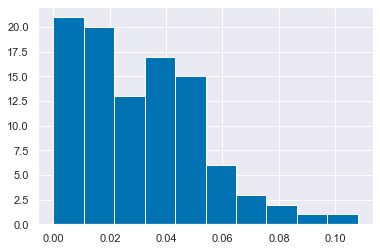

In [32]:
gender_gap[temp].abs().hist(bins=10)

In [33]:
high_gap_high_corr = gender_gap[temp].abs()[ gender_gap[temp].abs()>.05 ].index

In [34]:
low_gap_high_corr = gender_gap[temp].abs()[ gender_gap[temp].abs()<.05 ].index

In [35]:
search(BES_reduced_with_na,"al_scale|gender")

al_scale__Authoritarian    26914
gender_Female              31468
dtype: int64

In [36]:
gender_gap.sort_values().head(50)

# selfPriorities_brexit_Yes  -0.120022
# p_scot_const_vote_2011_Scottish National Party (SNP) -0.117097 (p_scot_const_vote_2011_Liberal Democrat++)
# private sector, supervisor, full time ---


# empathy10, empathy9, empathy8, empathy7, empathy4 -
# empathy5, empathy6 +

### notably, the empathy variables that don't have a gap (1,2,3) all begin "I can ..."


# lower pol attention, less likely to read newspaper

selfOccSuperviseLast_Yes                                                                                                                 -0.181702
p_job_sector_Private sector profit-seeking (e.g. public limited company, partnership)                                                    -0.179007
sectorPartner_Other public sector employer *Incl eg: - Central govt/ Civil Service/ Govt Agency - Local authority/ Local Educ Auth/sch   -0.149172
sector_Private sector firm of company Including, for example, limited companies and PLCs                                                 -0.147856
p_work_stat_Working full time (30 or more hours per week)                                                                                -0.128895
workingStatus_Working full time (30 or more hours per week)                                                                              -0.123512
selfPriorities_brexit_Yes                                                                                             

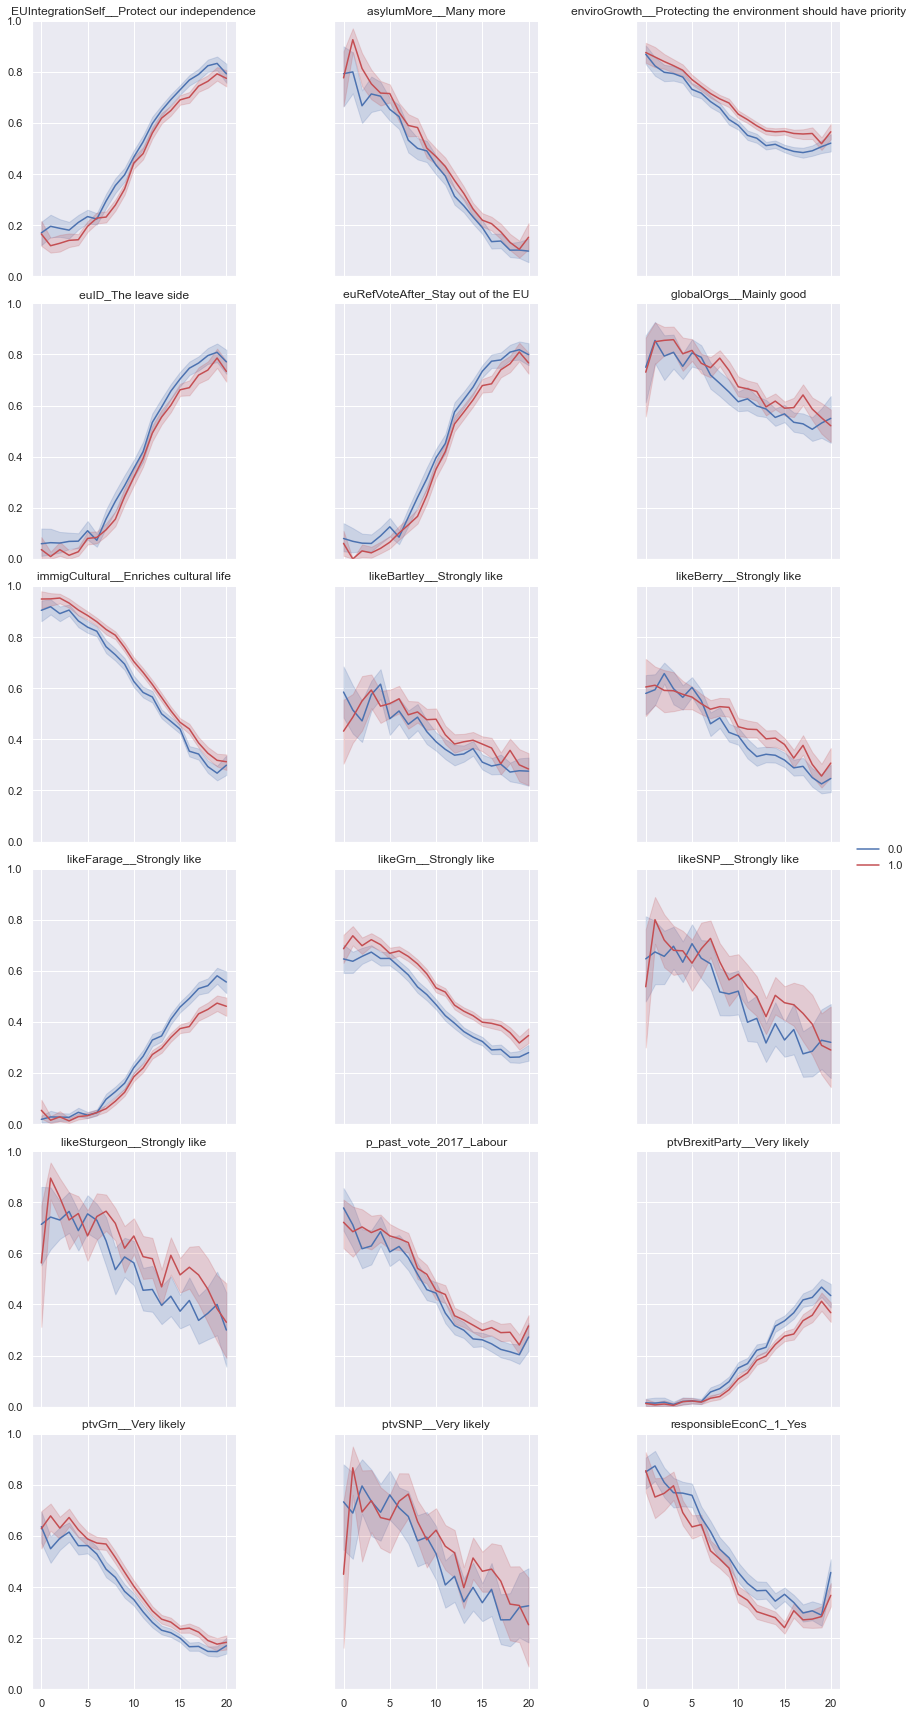

In [368]:
# data =pd.concat([authoritarianism,femaleEquality,gayEquality,blackEquality,het_or_not,df["gender"]],axis=1)
data = BES_reduced_with_na[["al_scale__Authoritarian","gender_Female"]+list(high_gap_high_corr)].astype('float')
data = data.melt(id_vars=["al_scale__Authoritarian","gender_Female"])

var_maxes = data.groupby("variable")["value"].max()

data["value"] = data["value"]/var_maxes[data["variable"]].values

g = sns.FacetGrid(data=data, col="variable",height=4,col_wrap=3)
g.map_dataframe(sns.lineplot,x="al_scale__Authoritarian",y="value",hue="gender_Female",palette={0:'b',1:'r'});
g.set_titles(col_template="{col_name}")
plt.ylim([0,1]);
g.add_legend();
# g.axes[0,0].set_xlabel('Authoritarianism');
# g.axes[0,1].set_xlabel('Authoritarianism');
# g.axes[0,2].set_xlabel('Authoritarianism');
# g.set(yticks=[0,1,2,3,4])
# g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
#                        'About right','Gone too far',
#                        'Gone much too far']);

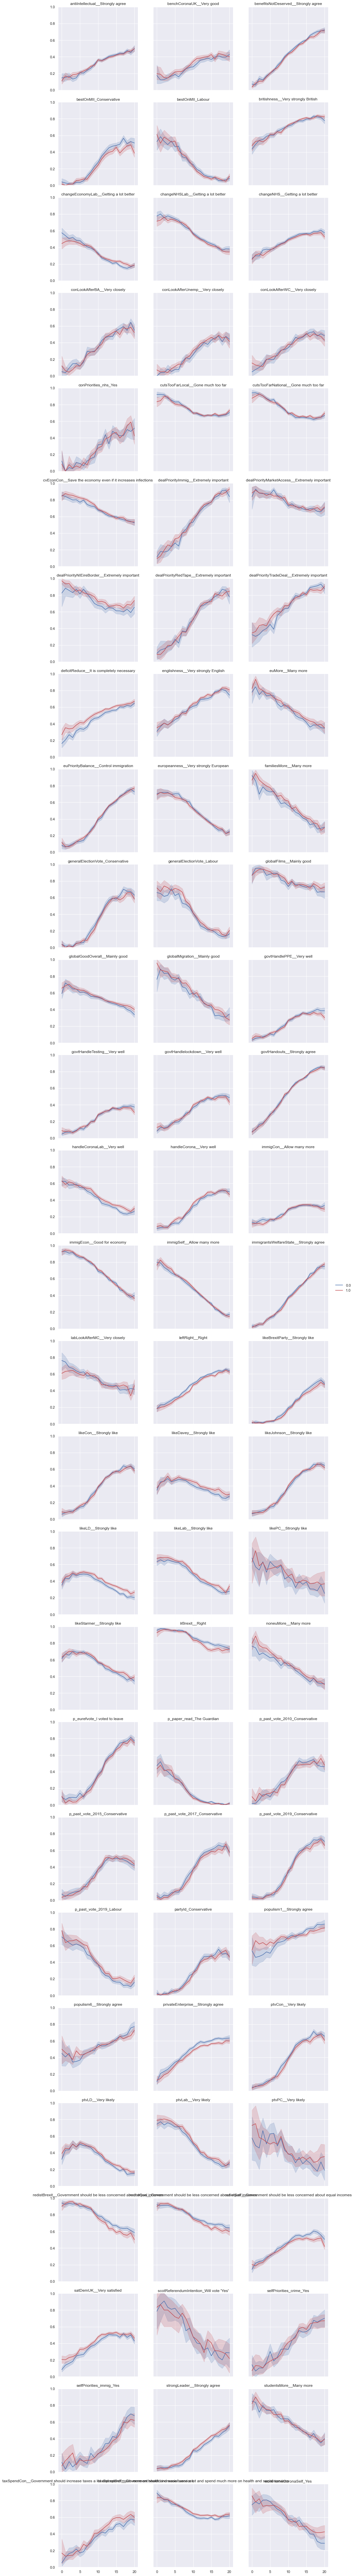

In [369]:
# data =pd.concat([authoritarianism,femaleEquality,gayEquality,blackEquality,het_or_not,df["gender"]],axis=1)
data = BES_reduced_with_na[["al_scale__Authoritarian","gender_Female"]+list(low_gap_high_corr)].astype('float')
data = data.melt(id_vars=["al_scale__Authoritarian","gender_Female"])

var_maxes = data.groupby("variable")["value"].max()

data["value"] = data["value"]/var_maxes[data["variable"]].values

g = sns.FacetGrid(data=data, col="variable",height=4,col_wrap=3)
g.map_dataframe(sns.lineplot,x="al_scale__Authoritarian",y="value",hue="gender_Female",palette={0:'b',1:'r'});
g.set_titles(col_template="{col_name}")
plt.ylim([0,1]);
g.add_legend();
# g.axes[0,0].set_xlabel('Authoritarianism');
# g.axes[0,1].set_xlabel('Authoritarianism');
# g.axes[0,2].set_xlabel('Authoritarianism');
# g.set(yticks=[0,1,2,3,4])
# g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
#                        'About right','Gone too far',
#                        'Gone much too far']);

In [ ]:
# subset of examples which *really* seem like they should be more about economic left/right

# redistSelf, privateEnterprise, govtHandouts, cutsTooFarLocal/National, deficitReduce, benefitsNotDeserved

In [39]:
search(BES_reduced_with_na,"redistSelf|privateEnterprise|deficitReduce|cutsTooFarLocal|cutsTooFarNational|govtHandouts|benefitsNotDeserved").index

Index(['cutsTooFarNational__Gone much too far',
       'cutsTooFarLocal__Gone much too far',
       'redistSelf__Government should be less concerned about equal incomes',
       'privateEnterprise__Strongly agree', 'govtHandouts__Strongly agree',
       'benefitsNotDeserved__Strongly agree',
       'deficitReduce__It is completely necessary'],
      dtype='object')

In [ ]:
# itr = pd.read_stata('file.dta', iterator=True)
# itr.variable_labels()

In [48]:
weirdly_econ_looking = ['redistSelf__Government should be less concerned about equal incomes',
                        'privateEnterprise__Strongly agree',
                        'deficitReduce__It is completely necessary',
#        'cutsTooFarNational__Gone much too far',
       'cutsTooFarLocal__Gone much too far',
        'govtHandouts__Strongly agree',
       'benefitsNotDeserved__Strongly agree',
       ]

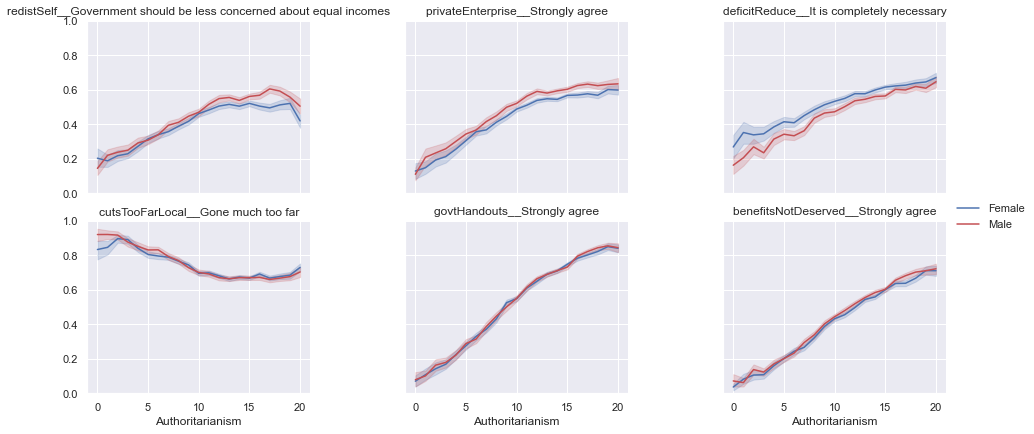

In [60]:
# data =pd.concat([authoritarianism,femaleEquality,gayEquality,blackEquality,het_or_not,df["gender"]],axis=1)
gender = BES_reduced_with_na["gender_Female"].replace({1:"Female",0:"Male"})
data = BES_reduced_with_na[["al_scale__Authoritarian"]+list(weirdly_econ_looking)].astype('float')
data["gender"] = gender
data = data.melt(id_vars=["al_scale__Authoritarian","gender"])

var_maxes = data.groupby("variable")["value"].max()

data["value"] = data["value"]/var_maxes[data["variable"]].values

g = sns.FacetGrid(data=data, col="variable",height=3,col_wrap=3,aspect=1.5)
g.map_dataframe(sns.lineplot,x="al_scale__Authoritarian",y="value",hue="gender",palette={"Female":'b',"Male":'r'});
g.set_titles(col_template="{col_name}")
plt.ylim([0,1]);
g.add_legend();
g.axes[-1].set_xlabel('Authoritarianism');
g.axes[-2].set_xlabel('Authoritarianism');
g.axes[-3].set_xlabel('Authoritarianism');
# g.set(yticks=[0,1,2,3,4])
# g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
#                        'About right','Gone too far',
#                        'Gone much too far']);

In [74]:
replace_dict = {'Private sector firm of company Including, for example, limited companies and PLCs':"Private",
       'Nationalised industry or public corporation *Including, for example, the Post Office and the BBC':"Public",
       'Other public sector employer Incl eg: - Central govt/ Civil Service/ Govt Agency - Local authority/ Local Educ Auth/sch':"Public",
       'Charity/voluntary sector Including, for example, charitable companies, churches, trade unions:':"Public",
       'Other':np.nan, 'Self-employed':"Private", 'Own your own business / company':"Private",
       "Don't know":np.nan}
sector_broad = BES_Panel["sector"].replace(replace_dict)
sector_broad.value_counts(dropna=False)


Private    16200
Public     11783
NaN         3485
Name: sector, dtype: int64

In [77]:
# BES_Panel["p_job_sector"].cat.categories
replace_dict = {'Private sector â profit-seeking (e.g. public limited company, partnership)':"Private",
       'Public sector â government owned or funded (e.g. civil service, local government, NHS, university)':"Public",
       'Third sector â non-profit, non-governmental (e.g. charity, social enterprise)':np.nan,
       "Don't know":np.nan, 'Not applicable':np.nan}
sector_narrow = BES_Panel["p_job_sector"].replace(replace_dict)
sector_narrow.value_counts(dropna=False)

NaN        16870
Private     9253
Public      5345
Name: p_job_sector, dtype: int64

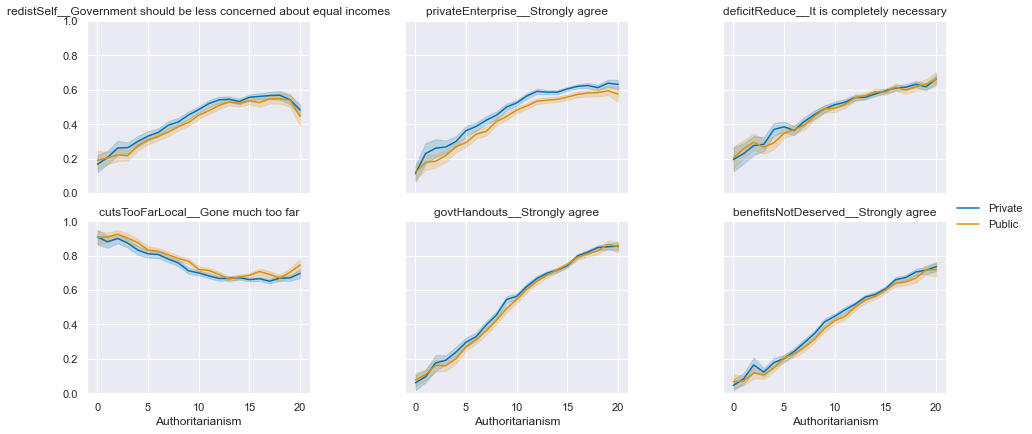

In [78]:
# data =pd.concat([authoritarianism,femaleEquality,gayEquality,blackEquality,het_or_not,df["gender"]],axis=1)
# gender = BES_reduced_with_na["gender_Female"].replace({1:"Female",0:"Male"})
data = BES_reduced_with_na[["al_scale__Authoritarian"]+list(weirdly_econ_looking)].astype('float')
data["sector_broad"] = sector_broad
data = data.melt(id_vars=["al_scale__Authoritarian","sector_broad"])

var_maxes = data.groupby("variable")["value"].max()

data["value"] = data["value"]/var_maxes[data["variable"]].values

g = sns.FacetGrid(data=data, col="variable",height=3,col_wrap=3,aspect=1.5)
g.map_dataframe(sns.lineplot,x="al_scale__Authoritarian",y="value",hue="sector_broad");
g.set_titles(col_template="{col_name}")
plt.ylim([0,1]);
g.add_legend();
g.axes[-1].set_xlabel('Authoritarianism');
g.axes[-2].set_xlabel('Authoritarianism');
g.axes[-3].set_xlabel('Authoritarianism');
# g.set(yticks=[0,1,2,3,4])
# g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
#                        'About right','Gone too far',
#                        'Gone much too far']);

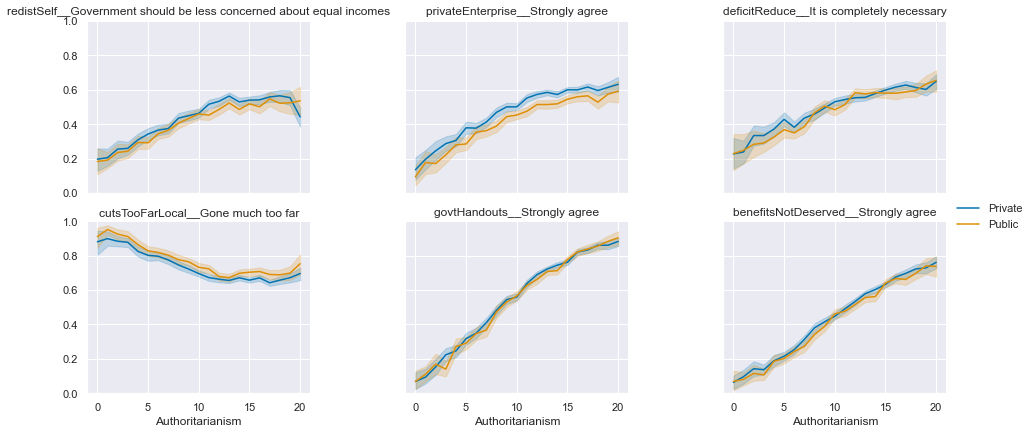

In [79]:
# data =pd.concat([authoritarianism,femaleEquality,gayEquality,blackEquality,het_or_not,df["gender"]],axis=1)
# gender = BES_reduced_with_na["gender_Female"].replace({1:"Female",0:"Male"})
data = BES_reduced_with_na[["al_scale__Authoritarian"]+list(weirdly_econ_looking)].astype('float')
data["sector_narrow"] = sector_narrow
data = data.melt(id_vars=["al_scale__Authoritarian","sector_narrow"])

var_maxes = data.groupby("variable")["value"].max()

data["value"] = data["value"]/var_maxes[data["variable"]].values

g = sns.FacetGrid(data=data, col="variable",height=3,col_wrap=3,aspect=1.5)
g.map_dataframe(sns.lineplot,x="al_scale__Authoritarian",y="value",hue="sector_narrow");
g.set_titles(col_template="{col_name}")
plt.ylim([0,1]);
g.add_legend();
g.axes[-1].set_xlabel('Authoritarianism');
g.axes[-2].set_xlabel('Authoritarianism');
g.axes[-3].set_xlabel('Authoritarianism');
# g.set(yticks=[0,1,2,3,4])
# g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
#                        'About right','Gone too far',
#                        'Gone much too far']);

In [ ]:
### Okay - what's the programme here?

In [43]:
search(df,"asylumMore")

Series([], dtype: float64)

In [42]:
search(df,"gay|immig|asylum")

immigEcon      30949
immigSelf      30949
immigCon       30949
immigLab       30949
immigLD        30949
immigSNP        3035
immigPC         1861
immigBrexit    30949
immigGreen     30949
gayEquality    30949
dtype: int64

In [44]:
gayEquality = df["gayEquality"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
immigSelf = df["immigSelf"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
immigEcon = df["immigEcon"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)





In [46]:
## save these somewhere

def m(x, w):
    """Weighted Mean"""
    return np.sum(x * w) / np.sum(w)

def cov(x, y, w):
    """Weighted Covariance"""
    return np.sum(w * (x - m(x, w)) * (y - m(y, w))) / np.sum(w)

def corr(x, y, w):
    """Weighted Correlation"""
    return cov(x, y, w) / np.sqrt(cov(x, x, w) * cov(y, y, w))

gayEquality.corr(immigSelf) # -0.5110263894971507
corr(gayEquality,immigSelf,df["wt"]) # -0.37526624207362114

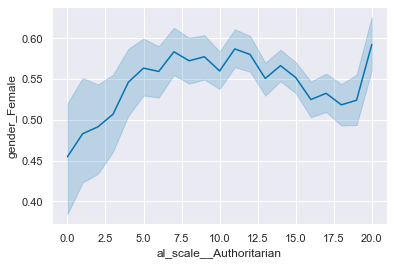

In [64]:
sns.lineplot(x=BES_reduced_with_na["al_scale__Authoritarian"],y=BES_reduced_with_na["gender_Female"])

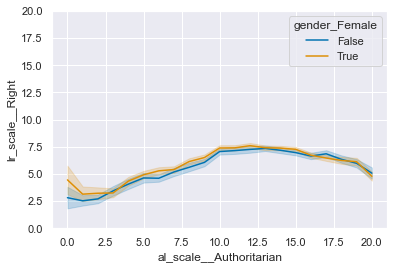

In [67]:
sns.lineplot(x=BES_reduced_with_na["al_scale__Authoritarian"],y=BES_reduced_with_na["lr_scale__Right"],hue=BES_reduced_with_na["gender_Female"])
plt.ylim([0,20]);

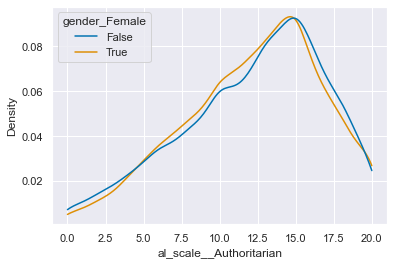

In [73]:
### check for some manual confounds

sns.kdeplot(x=BES_reduced_with_na["al_scale__Authoritarian"],hue=BES_reduced_with_na["gender_Female"],cut=0,common_norm=False)


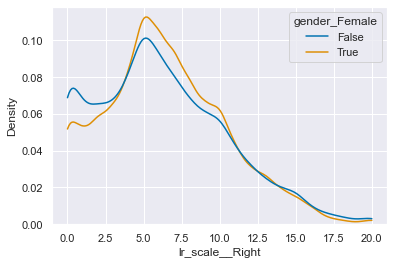

In [74]:
sns.kdeplot(x=BES_reduced_with_na["lr_scale__Right"],hue=BES_reduced_with_na["gender_Female"],cut=0,common_norm=False)

In [51]:
search(BES_reduced_with_na,"al_scale|lr_scale|gender")

lr_scale__Right            27872
al_scale__Authoritarian    26914
gender_Female              31468
dtype: int64

In [8]:
pan_dataset_values = pd.read_pickle( "E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\small data files\\pan_dataset_allr_valuesW19.zip", compression='zip' )

In [152]:
variable_inf = pd.DataFrame(columns = ["corr_with_al","corr_with_lr","total_gender_gap",
                                       "gender_gap_al25","gender_gap_al50","gender_gap_al75","gender_gap_al100",
                                       "gender_gap_lr25","gender_gap_lr50","gender_gap_lr75","gender_gap_lr100",
                                       "sample_size",
                                      ])

al_scale = pan_dataset_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"]
lr_scale = pan_dataset_values["Economic: Left(0) <-> Right(200){uniform}"]
al_scale_quarts = pd.qcut(al_scale,4).cat.codes.replace(-1,np.nan)
lr_scale_quarts = pd.qcut(lr_scale,4).cat.codes.replace(-1,np.nan)
# precomputed lr and lr quartiles
gender = BES_reduced_with_na["gender_Female"].replace({1:"Female",0:"Male"})

# note sample size!

for variable in BES_reduced_with_na.columns:
    var_max = BES_reduced_with_na[variable].max()
    rows = [
        BES_reduced_with_na[variable].corr(al_scale),
        BES_reduced_with_na[variable].corr(lr_scale),
        # gender gap Male-Female
        BES_reduced_with_na[variable].groupby(gender).mean().diff().loc["Male"]/var_max,
        BES_reduced_with_na[variable].groupby([gender,al_scale_quarts]).mean().loc[:,0].diff().loc["Male"]/var_max,
        BES_reduced_with_na[variable].groupby([gender,al_scale_quarts]).mean().loc[:,1].diff().loc["Male"]/var_max,
        BES_reduced_with_na[variable].groupby([gender,al_scale_quarts]).mean().loc[:,2].diff().loc["Male"]/var_max,
        BES_reduced_with_na[variable].groupby([gender,al_scale_quarts]).mean().loc[:,3].diff().loc["Male"]/var_max,

        BES_reduced_with_na[variable].groupby([gender,lr_scale_quarts]).mean().loc[:,0].diff().loc["Male"]/var_max,
        BES_reduced_with_na[variable].groupby([gender,lr_scale_quarts]).mean().loc[:,1].diff().loc["Male"]/var_max,
        BES_reduced_with_na[variable].groupby([gender,lr_scale_quarts]).mean().loc[:,2].diff().loc["Male"]/var_max,
        BES_reduced_with_na[variable].groupby([gender,lr_scale_quarts]).mean().loc[:,3].diff().loc["Male"]/var_max,
        # sample size
        (BES_reduced_with_na[variable].notnull()&al_scale.notnull()&lr_scale.notnull()&gender.notnull()).sum(),
        
    ]
    variable_inf.loc[variable] = rows

In [153]:
variable_inf

corr_with_al  corr_with_lr  \
turnoutUKGeneralW1__Very likely that I will vote     -0.047823      0.019833   
turnoutUKGeneralW2__Very likely that I will vote     -0.059585      0.004727   
turnoutUKGeneralW3__Very likely that I will vote     -0.045245      0.008440   
turnoutUKGeneralW4__Very likely that I will vote     -0.044764     -0.000311   
turnoutUKGeneralW5__Very likely that I will vote     -0.055799      0.008870   
...                                                        ...           ...   
responsibleEducationNoneW3_Yes                       -0.055270      0.040834   
achieveReduceImmigLabW18_Yes                         -0.009991     -0.082052   
achieveReduceImmigConW18_Yes                          0.246441      0.226035   
partyContactConW3_Yes                                 0.228342      0.315888   
partyContact1W3_Yes                                  -0.123663     -0.040478   

                                                  total_gender_gap  \
turnoutUKGeneralW1__Very likely that I will vote          0.037986   
turnoutUKGeneralW2__Very likely that I will vote          0.031601   
turnoutUKGeneralW3__Very likely that I will vote          0.035297   
turnoutUKGeneralW4__Very likely that I will vote          0.037006   
turnoutUKGeneralW5__Very likely that I will vote          0.021171   
...                                                            ...   
responsibleEducationNoneW3_Yes                           -0.008665   
achieveReduceImmigLabW18_Yes                             -0.007207   
achieveReduceImmigConW18_Yes                              0.019254   
partyContactConW3_Yes                                     0.004665   
partyContact1W3_Yes                                       0.059761   

                                                  gender_gap_al25  \
turnoutUKGeneralW1__Very likely that I will vote         0.008517   
turnoutUKGeneralW2__Very likely that I will vote         0.007757   
turnoutUKGeneralW3__Very likely that I will vote         0.012980   
turnoutUKGeneralW4__Very likely that I will vote         0.013066   
turnoutUKGeneralW5__Very likely that I will vote         0.002503   
...                                                           ...   
responsibleEducationNoneW3_Yes                          -0.015558   
achieveReduceImmigLabW18_Yes                             0.010592   
achieveReduceImmigConW18_Yes                            -0.024169   
partyContactConW3_Yes                                   -0.037004   
partyContact1W3_Yes                                      0.074194   

                                                  gender_gap_al50  \
turnoutUKGeneralW1__Very likely that I will vote         0.033442   
turnoutUKGeneralW2__Very likely that I will vote         0.024681   
turnoutUKGeneralW3__Very likely that I will vote         0.041540   
turnoutUKGeneralW4__Very likely that I will vote         0.033528   
turnoutUKGeneralW5__Very likely that I will vote         0.021643   
...                                                           ...   
responsibleEducationNoneW3_Yes                          -0.026250   
achieveReduceImmigLabW18_Yes                            -0.002333   
achieveReduceImmigConW18_Yes                             0.027821   
partyContactConW3_Yes                                    0.035345   
partyContact1W3_Yes                                      0.050406   

                                                  gender_gap_al75  \
turnoutUKGeneralW1__Very likely that I will vote         0.054950   
turnoutUKGeneralW2__Very likely that I will vote         0.045751   
turnoutUKGeneralW3__Very likely that I will vote         0.040708   
turnoutUKGeneralW4__Very likely that I will vote         0.051812   
turnoutUKGeneralW5__Very likely that I will vote         0.032988   
...                                                           ...   
responsibleEducationNoneW3_Yes                           0.003644   
achieveReduceImmigLabW18_Yes          

In [18]:
drop_list = search(BES_reduced_with_na,"al_scale|lr_scale|^gender_|^al\dW|^lr\dW").index

In [130]:
search(BES_reduced_with_na,"al_scale|lr_scale|^gender_|^al\dW|^lr\dW")

lr1W6__Strongly agree         28906
lr2W6__Strongly agree         29229
lr3W6__Strongly agree         29155
lr4W6__Strongly agree         29443
lr5W6__Strongly agree         29096
                              ...  
lr_scaleW16__Right            33450
al_scaleW16__Authoritarian    32671
lr_scaleW17__Right            30488
al_scaleW17__Authoritarian    29773
gender_Female                 96090
Length: 97, dtype: int64

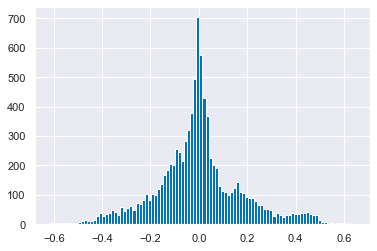

In [132]:
variable_inf.drop(drop_list).corr_with_al.hist(bins=100)

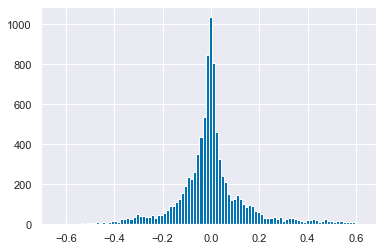

In [133]:
variable_inf.drop(drop_list).corr_with_lr.hist(bins=100)

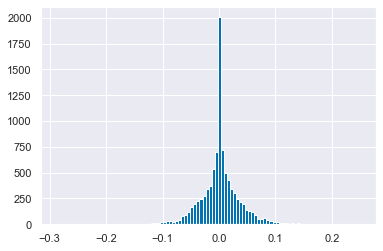

In [139]:
variable_inf.drop(drop_list).total_gender_gap.hist(bins=100)

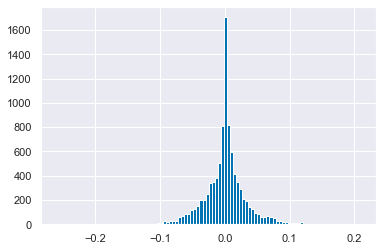

In [144]:
variable_inf.drop(drop_list).gender_gap_al25.hist(bins=100)

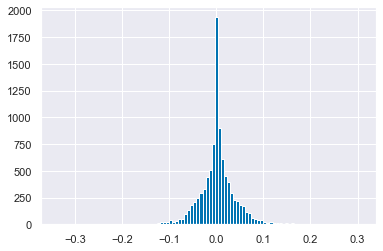

In [145]:
variable_inf.drop(drop_list).gender_gap_al50.hist(bins=100)

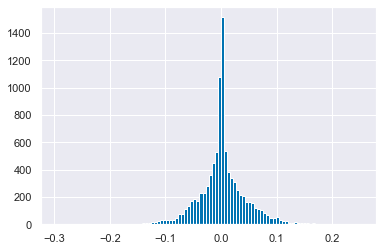

In [146]:
variable_inf.drop(drop_list).gender_gap_al75.hist(bins=100)

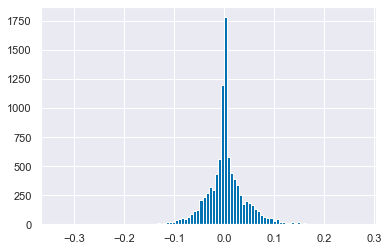

In [147]:
variable_inf.drop(drop_list).gender_gap_al100.hist(bins=100)

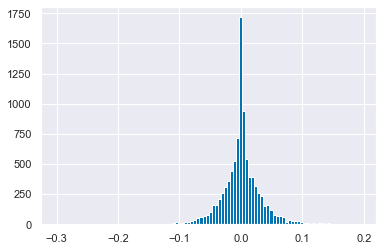

In [148]:
variable_inf.drop(drop_list).gender_gap_lr25.hist(bins=100)

In [156]:
variable_inf.corr()

corr_with_al  corr_with_lr  total_gender_gap  \
corr_with_al          1.000000      0.536510          0.073472   
corr_with_lr          0.536510      1.000000          0.203523   
total_gender_gap      0.073472      0.203523          1.000000   
gender_gap_al25      -0.015267      0.131763          0.889536   
gender_gap_al50       0.102159      0.217547          0.965345   
gender_gap_al75       0.134087      0.251855          0.965451   
gender_gap_al100      0.136418      0.235474          0.945073   
gender_gap_lr25      -0.067026      0.085393          0.926798   
gender_gap_lr50       0.159923      0.307166          0.957866   
gender_gap_lr75       0.215154      0.363063          0.952757   
gender_gap_lr100      0.189223      0.372834          0.933051   
sample_size           0.042535     -0.013982         -0.034058   

                  gender_gap_al25  gender_gap_al50  gender_gap_al75  \
corr_with_al            -0.015267         0.102159         0.134087   
corr_with_lr             0.131763         0.217547         0.251855   
total_gender_gap         0.889536         0.965345         0.965451   
gender_gap_al25          1.000000         0.865091         0.793918   
gender_gap_al50          0.865091         1.000000         0.915551   
gender_gap_al75          0.793918         0.915551         1.000000   
gender_gap_al100         0.731424         0.884726         0.930365   
gender_gap_lr25          0.878768         0.884584         0.859889   
gender_gap_lr50          0.857250         0.926156         0.927767   
gender_gap_lr75          0.826566         0.927210         0.937911   
gender_gap_lr100         0.788077         0.911090         0.929358   
sample_size             -0.025673        -0.039075        -0.028597   

                  gender_gap_al100  gender_gap_lr25  gender_gap_lr50  \
corr_with_al              0.136418        -0.067026         0.159923   
corr_with_lr              0.235474         0.085393         0.307166   
total_gender_gap          0.945073         0.926798         0.957866   
gender_gap_al25           0.731424         0.878768         0.857250   
gender_gap_al50           0.884726         0.884584         0.926156   
gender_gap_al75           0.930365         0.859889         0.927767   
gender_gap_al100          1.000000         0.860524         0.904163   
gender_gap_lr25           0.860524         1.000000         0.874476   
gender_gap_lr50           0.904163         0.874476         1.000000   
gender_gap_lr75           0.913114         0.830456         0.928406   
gender_gap_lr100          0.902559         0.769585         0.879640   
sample_size              -0.031487        -0.023946        -0.037396   

                  gender_gap_lr75  gender_gap_lr100  sample_size  
corr_with_al             0.215154          0.189223     0.042535  
corr_with_lr             0.363063          0.372834    -0.013982  
total_gender_gap         0.952757          0.933051    -0.034058  
gender_gap_al25          0.826566          0.788077    -0.025673  
gender_gap_al50          0.927210          0.911090    -0.039075  
gender_gap_al75          0.937911          0.929358    -0.028597  
gender_gap_al100         0.913114          0.902559    -0.031487  
gender_gap_lr25          0.830456          0.769585    -0.023946  
gender_gap_lr50          0.928406          0.879640    -0.037396  
gender_gap_lr75          1.000000          0.918708    -0.036032  
gender_gap_lr100         0.918708          1.000000    -0.029289  
sample_size             -0.036032         -0.029289     1.000000

In [155]:
variable_inf.abs().corr()

corr_with_al  corr_with_lr  total_gender_gap  \
corr_with_al          1.000000      0.381702          0.157680   
corr_with_lr          0.381702      1.000000          0.109174   
total_gender_gap      0.157680      0.109174          1.000000   
gender_gap_al25       0.151523      0.145525          0.841422   
gender_gap_al50       0.176351      0.121488          0.948326   
gender_gap_al75       0.178488      0.135548          0.947730   
gender_gap_al100      0.152134      0.098337          0.919242   
gender_gap_lr25       0.138319      0.052671          0.900375   
gender_gap_lr50       0.186165      0.187143          0.936830   
gender_gap_lr75       0.207831      0.225376          0.928697   
gender_gap_lr100      0.213790      0.230618          0.901819   
sample_size          -0.071470     -0.125329         -0.070066   

                  gender_gap_al25  gender_gap_al50  gender_gap_al75  \
corr_with_al             0.151523         0.176351         0.178488   
corr_with_lr             0.145525         0.121488         0.135548   
total_gender_gap         0.841422         0.948326         0.947730   
gender_gap_al25          1.000000         0.820083         0.731993   
gender_gap_al50          0.820083         1.000000         0.883858   
gender_gap_al75          0.731993         0.883858         1.000000   
gender_gap_al100         0.672921         0.843371         0.901249   
gender_gap_lr25          0.835944         0.849882         0.816957   
gender_gap_lr50          0.803403         0.896878         0.895486   
gender_gap_lr75          0.764507         0.896348         0.909268   
gender_gap_lr100         0.725244         0.874389         0.897620   
sample_size             -0.100605        -0.098303        -0.103186   

                  gender_gap_al100  gender_gap_lr25  gender_gap_lr50  \
corr_with_al              0.152134         0.138319         0.186165   
corr_with_lr              0.098337         0.052671         0.187143   
total_gender_gap          0.919242         0.900375         0.936830   
gender_gap_al25           0.672921         0.835944         0.803403   
gender_gap_al50           0.843371         0.849882         0.896878   
gender_gap_al75           0.901249         0.816957         0.895486   
gender_gap_al100          1.000000         0.822200         0.865711   
gender_gap_lr25           0.822200         1.000000         0.840518   
gender_gap_lr50           0.865711         0.840518         1.000000   
gender_gap_lr75           0.877912         0.786811         0.900544   
gender_gap_lr100          0.858216         0.715800         0.831723   
sample_size              -0.083968        -0.049253        -0.083900   

                  gender_gap_lr75  gender_gap_lr100  sample_size  
corr_with_al             0.207831          0.213790    -0.071470  
corr_with_lr             0.225376          0.230618    -0.125329  
total_gender_gap         0.928697          0.901819    -0.070066  
gender_gap_al25          0.764507          0.725244    -0.100605  
gender_gap_al50          0.896348          0.874389    -0.098303  
gender_gap_al75          0.909268          0.897620    -0.103186  
gender_gap_al100         0.877912          0.858216    -0.083968  
gender_gap_lr25          0.786811          0.715800    -0.049253  
gender_gap_lr50          0.900544          0.831723    -0.083900  
gender_gap_lr75          1.000000          0.881989    -0.109378  
gender_gap_lr100         0.881989          1.000000    -0.124418  
sample_size             -0.109378         -0.124418     1.000000

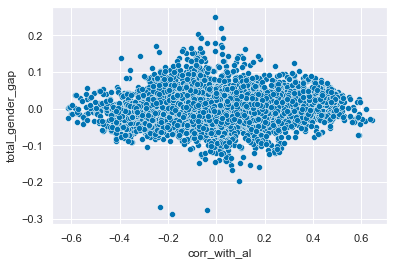

In [158]:
sns.scatterplot(variable_inf["corr_with_al"].drop(drop_list),variable_inf["total_gender_gap"].drop(drop_list),)

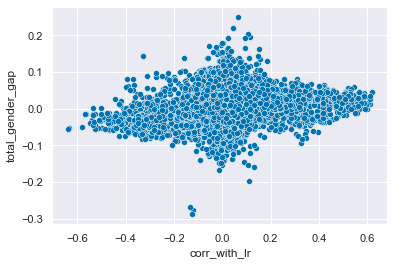

In [163]:
sns.scatterplot(variable_inf["corr_with_lr"].drop(drop_list),variable_inf["total_gender_gap"].drop(drop_list),)

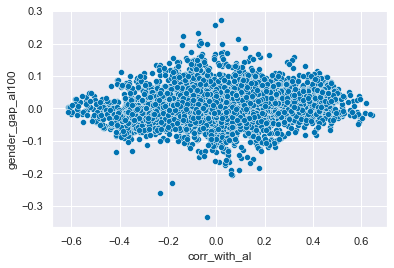

In [159]:
sns.scatterplot(variable_inf["corr_with_al"].drop(drop_list),variable_inf["gender_gap_al100"].drop(drop_list),)

In [164]:
variable_inf["gender_gap_al100"].drop(drop_list).sort_values()

affempathyIRTW14                                                      -0.335501
subjectHEW1_W3_Humanities, social sciences, psychology or education   -0.260706
subjectHEW15_Humanities, social sciences, psychology or education     -0.229853
ns_sec_analyticW19_Intermediate occupations                           -0.204289
euKnow4W8_False                                                       -0.203002
                                                                         ...   
JACS_subject_labelW19_Mathematical sciences                            0.214665
euKnow6W15_False                                                       0.222659
selfOccSuperviseLastW19_Yes                                            0.231452
subjectHEW15_Engineering, Mathematics or Natural sciences              0.257294
subjectHEW1_W3_Engineering, Mathematics or Natural sciences            0.273325
Name: gender_gap_al100, Length: 9423, dtype: float64

In [165]:
variable_inf["gender_gap_al25"].drop(drop_list).sort_values()

subjectHEW15_Humanities, social sciences, psychology or education                            -0.260225
subjectHEW1_W3_Humanities, social sciences, psychology or education                          -0.240033
affempathyIRTW14                                                                             -0.221386
mpVoteConstSelfW17_MP should vote according to the opinion of voters in their constituency   -0.219315
cuKnow3W16_False                                                                             -0.193434
                                                                                                ...   
freeSpeechRacistElectionW15__Definitely                                                       0.175988
certaintyEULDW8__Very certain                                                                 0.175997
euKnow5W8_False                                                                               0.185162
subjectHEW1_W3_Engineering, Mathematics or Natural sciences              

In [166]:
variable_inf.to_pickle( "E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\small data files\\gender_gap_var_inf.zip", compression='zip' )

In [ ]:
# total_gender_gap
# subjectHEW15_Humanities, social sciences, psychology or education     -0.288131
# affempathyIRTW14                                                      -0.275554
# subjectHEW1_W3_Humanities, social sciences, psychology or education   -0.267807
# subjectHEW1_W3_Engineering, Mathematics or Natural sciences            0.219991
# subjectHEW15_Engineering, Mathematics or Natural sciences              0.251137

In [13]:
variable_inf = pd.read_pickle( "E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\small data files\\gender_gap_var_inf.zip", compression='zip' )

In [9]:
al_scale = pan_dataset_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"]
lr_scale = pan_dataset_values["Economic: Left(0) <-> Right(200){uniform}"]
# al_scale_quarts = pd.qcut(al_scale,4).cat.codes.replace(-1,np.nan)
# lr_scale_quarts = pd.qcut(lr_scale,4).cat.codes.replace(-1,np.nan)
# # precomputed lr and lr quartiles
gender = BES_reduced_with_na["gender_Female"].replace({1:"Female",0:"Male"})

In [41]:
frac=.05

pos_al_corr = variable_inf["corr_with_al"]> variable_inf["corr_with_al"].drop(drop_list).quantile(1-frac)
neg_al_corr = variable_inf["corr_with_al"]< variable_inf["corr_with_al"].drop(drop_list).quantile(frac)
pos_al100_gender_gap = variable_inf["gender_gap_al100"]> variable_inf["gender_gap_al100"].drop(drop_list).quantile(1-frac)
neg_al100_gender_gap = variable_inf["gender_gap_al100"]< variable_inf["gender_gap_al100"].drop(drop_list).quantile(frac)


In [42]:
BES_reduced_with_na.columns[pos_al_corr&pos_al100_gender_gap&(variable_inf['sample_size']>10000)]

Index(['likeUKIPW1__Strongly like', 'ptvUKIPW1__Very likely',
       'likeFarageW2__Strongly like', 'likeUKIPW2__Strongly like',
       'ptvUKIPW2__Very likely', 'likeFarageW3__Strongly like',
       'ptvUKIPW3__Very likely', 'likeFarageW4__Strongly like',
       'ptvUKIPW4__Very likely', 'likeFarageW5__Strongly like',
       'ptvUKIPW5__Very likely', 'likeFarageW6__Strongly like',
       'ptvUKIPW6__Very likely', 'likeFarageW7__Strongly like',
       'ptvUKIPW7__Very likely', 'likeFarageW8__Strongly like',
       'likeFarageW9__Strongly like', 'ptvUKIPW9__Very likely',
       'likeFarageW10__Strongly like', 'womenJobsW10__Strongly agree',
       'ptvUKIPW10__Very likely', 'likeFarageW11__Strongly like',
       'likeFarageW15__Strongly like', 'likeFarageW16__Strongly like',
       'noDealLongTermW16__Extremely good',
       'gayEqualityW16__Gone much too far', 'likeFarageW17__Strongly like',
       'gayEqualityW17__Gone much too far', 'likeFarageW18__Strongly like',
       'likeFarageW

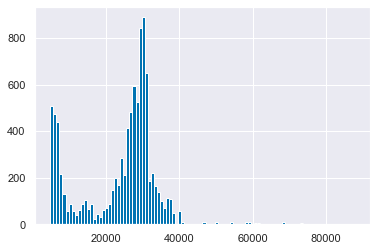

In [36]:
variable_inf['sample_size']

In [47]:

# al_scale = pan_dataset_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"]
# lr_scale = pan_dataset_values["Economic: Left(0) <-> Right(200){uniform}"]
# al_scale_quarts = pd.qcut(al_scale,4).cat.codes.replace(-1,np.nan)
# lr_scale_quarts = pd.qcut(lr_scale,4).cat.codes.replace(-1,np.nan)
# # precomputed lr and lr quartiles
# gender = BES_reduced_with_na["gender_Female"].replace({1:"Female",0:"Male"})

def plot_vars_against_gender(var_list):

    # data =pd.concat([authoritarianism,femaleEquality,gayEquality,blackEquality,het_or_not,df["gender"]],axis=1)
#     gender = BES_reduced_with_na["gender_Female"].replace({1:"Female",0:"Male"})
    data = pd.concat([al_scale, BES_reduced_with_na[list(var_list)].astype('float')] ,axis=1)
    data["gender"] = gender
    data = data.melt(id_vars=[al_scale.name,"gender"])

    var_maxes = data.groupby("variable")["value"].max()

    data["value"] = data["value"]/var_maxes[data["variable"]].values

    g = sns.FacetGrid(data=data, col="variable",height=3,col_wrap=3,aspect=1.5)
    g.map_dataframe(sns.lineplot,x=al_scale.name,y="value",hue="gender",palette={"Female":'b',"Male":'r'});
    g.set_titles(col_template="{col_name}")
    plt.ylim([0,1]);
    g.add_legend();
    g.axes[-1].set_xlabel('Authoritarianism');
    g.axes[-2].set_xlabel('Authoritarianism');
    g.axes[-3].set_xlabel('Authoritarianism');
    # g.set(yticks=[0,1,2,3,4])
    # g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
    #                        'About right','Gone too far',
    #                        'Gone much too far']);

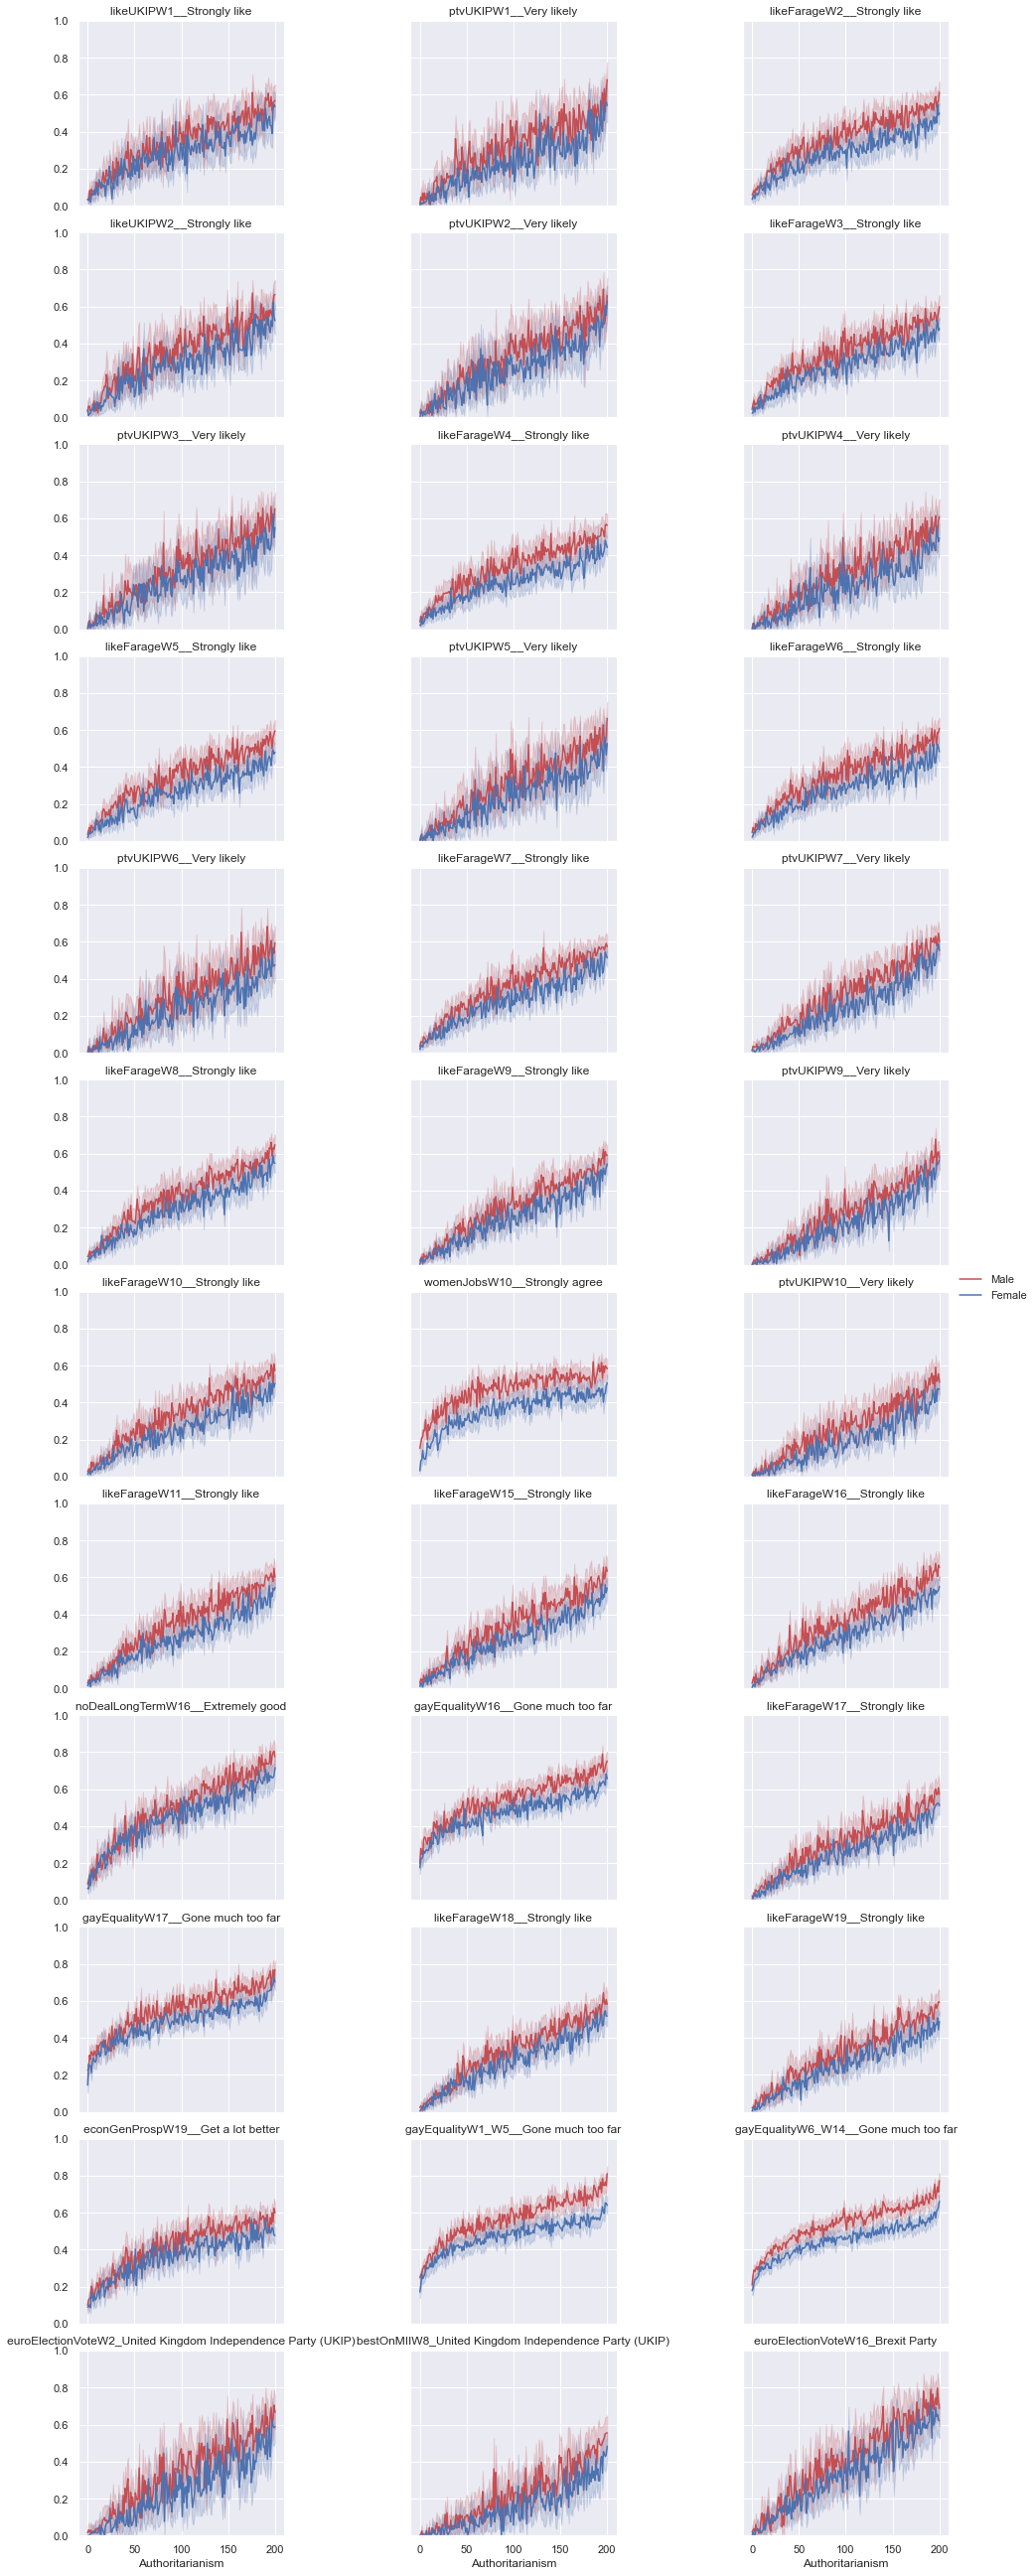

In [49]:
var_list = BES_reduced_with_na.columns[pos_al_corr&pos_al100_gender_gap&(variable_inf['sample_size']>10000)].drop(drop_list,errors='ignore')
plot_vars_against_gender(var_list)

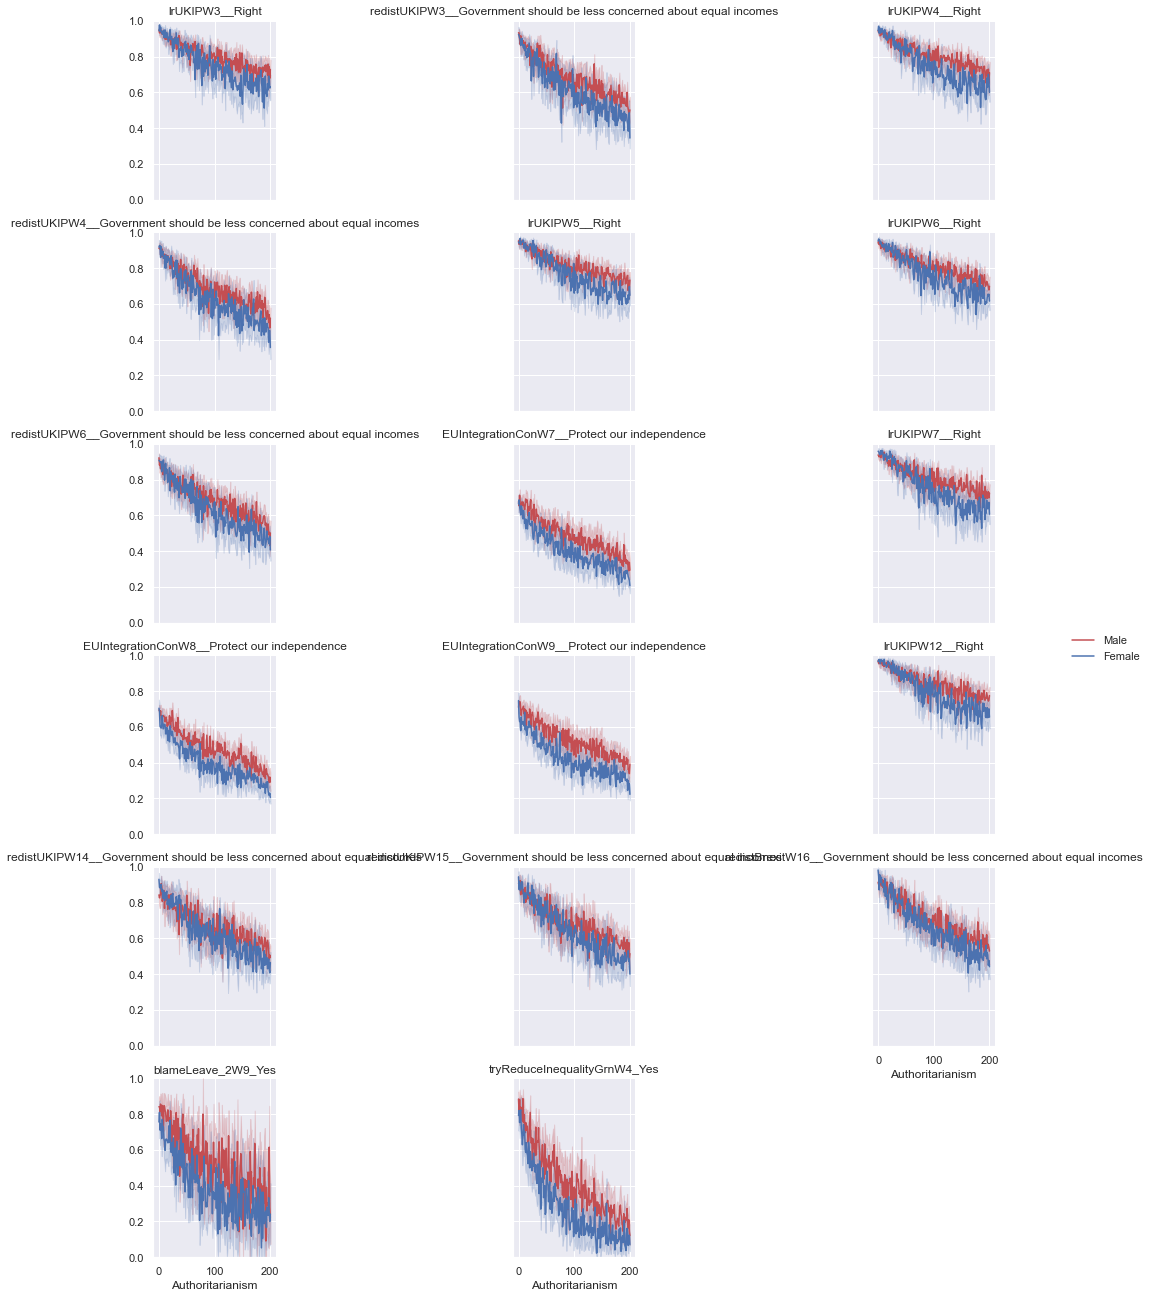

In [50]:
var_list = BES_reduced_with_na.columns[neg_al_corr&pos_al100_gender_gap&(variable_inf['sample_size']>10000)].drop(drop_list,errors='ignore')
plot_vars_against_gender(var_list)

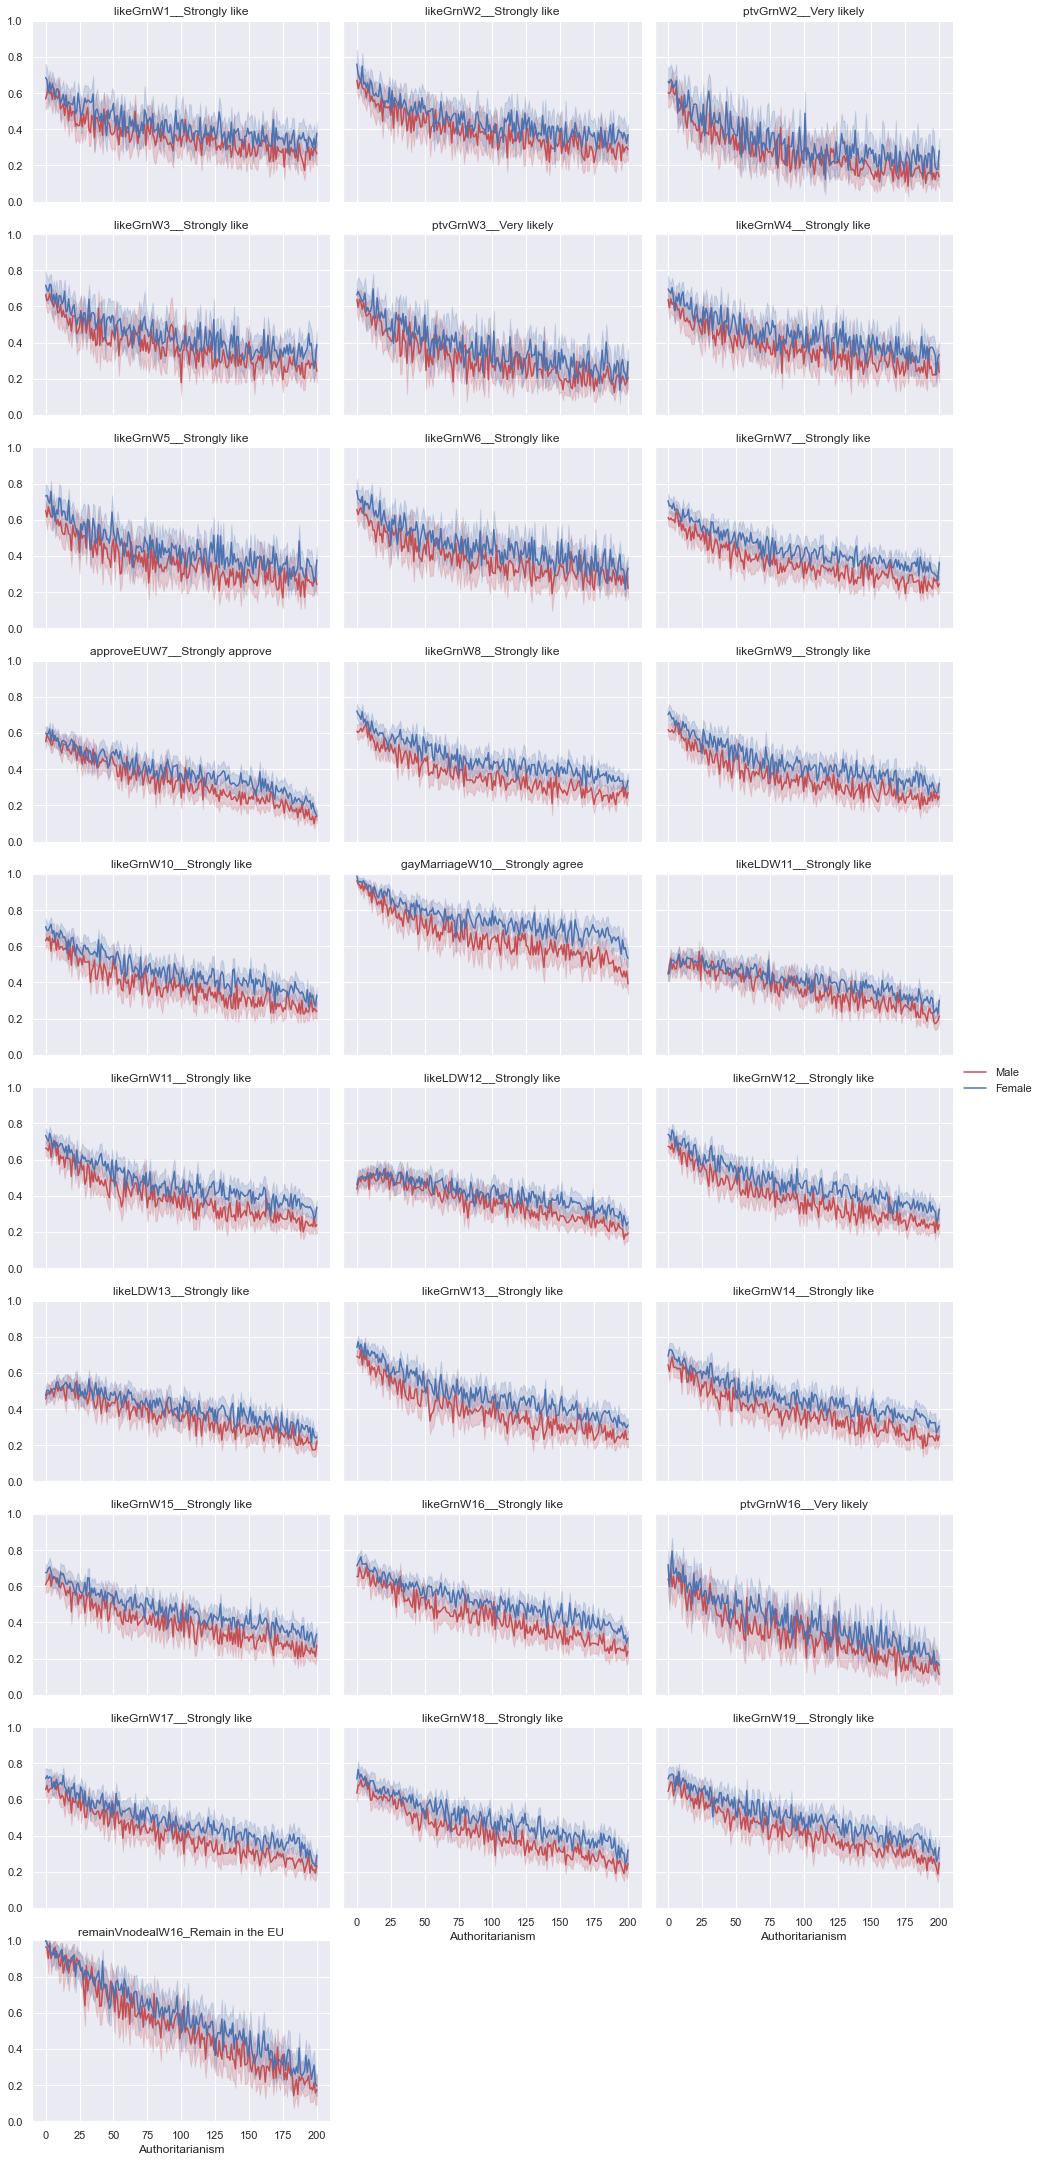

In [51]:
var_list = BES_reduced_with_na.columns[neg_al_corr&neg_al100_gender_gap&(variable_inf['sample_size']>10000)].drop(drop_list,errors='ignore')
plot_vars_against_gender(var_list)

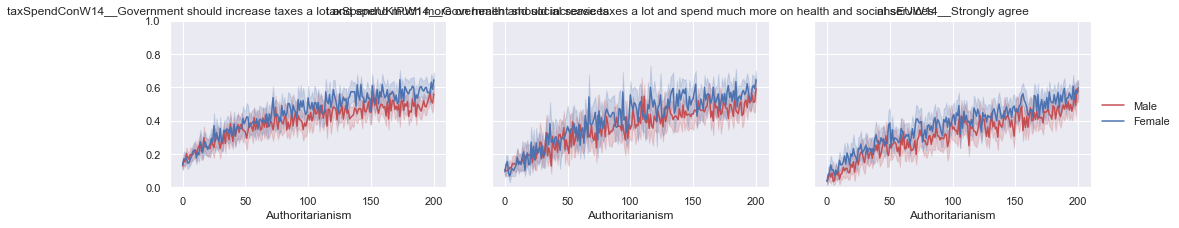

In [52]:
var_list = BES_reduced_with_na.columns[pos_al_corr&neg_al100_gender_gap&(variable_inf['sample_size']>10000)].drop(drop_list,errors='ignore')
plot_vars_against_gender(var_list)

In [53]:
var_list

Index(['taxSpendConW14__Government should increase taxes a lot and spend much more on health and social services',
       'taxSpendUKIPW14__Government should increase taxes a lot and spend much more on health and social services',
       'nhsEUW14__Strongly agree'],
      dtype='object')

In [151]:
# variable_inf

In [142]:
variable_inf.drop(drop_list).total_gender_gap.sort_values().head(10)

subjectHEW15_Humanities, social sciences, psychology or education                                                                   -0.288131
affempathyIRTW14                                                                                                                    -0.275554
subjectHEW1_W3_Humanities, social sciences, psychology or education                                                                 -0.267807
successReduceInequalityDKW4_Yes                                                                                                     -0.197775
ns_sec_analyticW19_Intermediate occupations                                                                                         -0.167818
successReduceInequalityDKW12_Yes                                                                                                    -0.157685
tryReduceInequalityDKW4_Yes                                                                                                         -0.154044
ns_sec

In [143]:
variable_inf.drop(drop_list).total_gender_gap.sort_values().tail(10)

euSources_4W7_Yes                                              0.171844
certaintyEUGreenW7__Very certain                               0.173432
polKnowAssadW10_President of Syria                             0.180371
certaintyEULDW8__Very certain                                  0.180527
certaintyEULDW7__Very certain                                  0.191934
selfOccSuperviseLastW1_Yes                                     0.193973
selfOccSuperviseLastW6_Yes                                     0.196666
selfOccSuperviseLastW19_Yes                                    0.203530
subjectHEW1_W3_Engineering, Mathematics or Natural sciences    0.219991
subjectHEW15_Engineering, Mathematics or Natural sciences      0.251137
Name: total_gender_gap, dtype: float64

In [110]:
BES_reduced_with_na["turnoutUKGeneralW1__Very likely that I will vote"].groupby([gender,al_scale_quarts]).mean().loc[:,1].diff().loc["Male"]

0.13376641

In [101]:
BES_reduced_with_na["turnoutUKGeneralW1__Very likely that I will vote"].groupby(gender).mean()

gender_Female
Female    3.432878
Male      3.584824
Name: turnoutUKGeneralW1__Very likely that I will vote, dtype: float32

id
1        3
2        1
3        2
4        2
5        1
        ..
98447    1
98448    0
98449    0
98450    2
98451    2
Length: 97006, dtype: int8

In [80]:
BES_reduced_with_na

turnoutUKGeneralW1__Very likely that I will vote  \
id                                                        
1                                                   4.0   
2                                                   4.0   
3                                                   4.0   
4                                                   4.0   
5                                                   4.0   
...                                                 ...   
98447                                               NaN   
98448                                               NaN   
98449                                               NaN   
98450                                               NaN   
98451                                               NaN   

       turnoutUKGeneralW2__Very likely that I will vote  \
id                                                        
1                                                   4.0   
2                                                   NaN   
3                                                   4.0   
4                                                   4.0   
5                                                   4.0   
...                                                 ...   
98447                                               NaN   
98448                                               NaN   
98449                                               NaN   
98450                                               NaN   
98451                                               NaN   

       turnoutUKGeneralW3__Very likely that I will vote  \
id                                                        
1                                                   NaN   
2                                                   4.0   
3                                                   4.0   
4                                                   NaN   
5                                                   NaN   
...                                                 ...   
98447                                               NaN   
98448                                               NaN   
98449                                               NaN   
98450                                               NaN   
98451                                               NaN   

       turnoutUKGeneralW4__Very likely that I will vote  \
id                                                        
1                                                   4.0   
2                                                   4.0   
3                                                   4.0   
4                                                   NaN   
5                                                   NaN   
...                                                 ...   
98447                                               NaN   
98448                                               NaN   
98449                                               NaN   
98450                                               NaN   
98451                                               NaN   

       turnoutUKGeneralW5__Very likely that I will vote  \
id                                                        
1                                                   4.0   
2                                                   4.0   
3                                                   4.0   
4                                                   NaN   
5                                                   NaN   
...                                                 ...   
98447                                               NaN   
98448                                               NaN   
98449                                               NaN   
98450                                               NaN   
98451                                               NaN   

       turnoutUKGeneralW7__Very likely that I will vote  \
id                                                        
1                                                

In [35]:
df = pd.read_stata( "E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W23_only\\BES2019_W23_v23.0.dta" )

In [6]:
search(df,"likeJohnson|al_scale|gender")

likeJohnson    30949
al_scale       26399
gender         30941
dtype: int64

In [25]:
gender = df["gender"]
likeJohnson = df["likeJohnson"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)/10
authoritarian = df["al_scale"].cat.codes.replace(-1,np.nan)/20
# likeFarage = df["likeFarage"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)/10

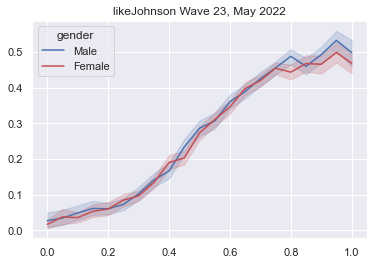

In [22]:
sns.lineplot(x=authoritarian,y=likeJohnson,hue=gender,palette={"Male":'b',"Female":'r'});
plt.title("likeJohnson Wave 23, May 2022");

In [24]:
search(df,"Farage")

Series([], dtype: float64)

In [16]:
likeJohnson.max()

10.0

In [9]:
gender.value_counts(dropna=False)

Female    17275
Male      13666
NaN           8
Name: gender, dtype: int64

In [12]:
authoritarian.value_counts(dropna=False)

NaN              4550
7.5              2434
7.0              2285
6.5              2123
8.0              1920
6.0              1878
5.0              1781
8.5              1745
5.5              1689
9.0              1458
4.5              1326
4.0              1163
9.5              1128
3.5              1029
Authoritarian     971
3.0               908
2.5               719
2.0               586
1.5               447
1.0               343
Libertarian       237
0.5               229
Name: al_scale, dtype: int64

In [13]:
likeJohnson

0                       7
1                       1
2        Strongly dislike
3                       6
4                       7
               ...       
30944                   5
30945                   2
30946                   2
30947                   7
30948                   6
Name: likeJohnson, Length: 30949, dtype: category
Categories (11, object): ['Strongly dislike' < '1' < '2' < '3' ... '7' < '8' < '9' < 'Strongly like']

In [64]:
BES_Panel["sector"].value_counts(dropna=False)

Private sector firm of company Including, for example, limited companies and PLCs                                          13680
Other public sector employer Incl eg: - Central govt/ Civil Service/ Govt Agency - Local authority/ Local Educ Auth/sch     9581
Self-employed                                                                                                               2077
Charity/voluntary sector Including, for example, charitable companies, churches, trade unions:                              1686
NaN                                                                                                                         1635
Don't know                                                                                                                  1211
Other                                                                                                                        639
Nationalised industry or public corporation *Including, for example, the Post Office and the BBC 

In [66]:
BES_Panel["p_job_sector"].value_counts(dropna=False)

Not applicable                                                                                          13718
Private sector â profit-seeking (e.g. public limited company, partnership)                             9253
Public sector â government owned or funded (e.g. civil service, local government, NHS, university)     5345
Third sector â non-profit, non-governmental (e.g. charity, social enterprise)                          1347
NaN                                                                                                      1231
Don't know                                                                                                574
Name: p_job_sector, dtype: int64

In [68]:
BES_Panel["p_job_sector"][BES_Panel["sector"]=="Private sector firm of company Including, for example, limited companies and PLCs"].value_counts()

Private sector â profit-seeking (e.g. public limited company, partnership)                            7351
Not applicable                                                                                          5327
Public sector â government owned or funded (e.g. civil service, local government, NHS, university)     238
Don't know                                                                                               132
Third sector â non-profit, non-governmental (e.g. charity, social enterprise)                          130
Name: p_job_sector, dtype: int64

In [67]:
BES_Panel["sector"].groupby(BES_Panel["p_job_sector"]).value_counts()

p_job_sector                                                                                          sector                                                                                                                 
Private sector â profit-seeking (e.g. public limited company, partnership)                          Private sector firm of company Including, for example, limited companies and PLCs                                          7351
                                                                                                      Self-employed                                                                                                               871
                                                                                                      Other public sector employer Incl eg: - Central govt/ Civil Service/ Govt Agency - Local authority/ Local Educ Auth/sch     286
                                                                                        

In [61]:
search(BES_reduced_with_na,"sector")

sector_Private sector firm of company Including, for example, limited companies and PLCs                                                  27983
sector_Other public sector employer Incl eg: - Central govt/ Civil Service/ Govt Agency - Local authority/ Local Educ Auth/sch            27983
sector_Self-employed                                                                                                                      27983
sector_Charity/voluntary sector Including, for example, charitable companies, churches, trade unions:                                     27983
sector_Nationalised industry or public corporation *Including, for example, the Post Office and the BBC                                   27983
sector_Own your own business / company                                                                                                    27983
sectorPartner_Private sector firm of company *Including, for example, limited companies and PLCs*                                       

In [358]:
## are any of these surprising?

# deficit_reduce (female -> necessary)
# privateenterprise -> matches male/female divide!
# taxSpend_self, redistSelf
# populism1


# maybe acquiescence, bias towards midpoint?
# strongLeader, satDemUK

# progression of p_vote_Conservative 2010/15/17/19 is cool
# ditto leftRight_self

0.0

In [ ]:
# get rid of variable=

In [ ]:
# age, resourceAccess1_2_Yes, resourceAccess3_5_Yes, edlevelPartner__Postgrad, 

# avoid things which might historical demographic 'overhangs'

# however, the education variables are prob more recent - 
# bears separate investigation!

# anyUni__Yes, I graduated from higher education
#  'p_edlevelUni__Postgrad',
#  'p_edlevel__Postgrad',
#  'p_education_age__Still at school/Full time student',

In [323]:
gender_gap.sort_values()

selfOccSuperviseLast_Yes                                                                                                                 -0.181702
p_job_sector_Private sector profit-seeking (e.g. public limited company, partnership)                                                    -0.179007
sectorPartner_Other public sector employer *Incl eg: - Central govt/ Civil Service/ Govt Agency - Local authority/ Local Educ Auth/sch   -0.149172
sector_Private sector firm of company Including, for example, limited companies and PLCs                                                 -0.147856
p_work_stat_Working full time (30 or more hours per week)                                                                                -0.128895
                                                                                                                                            ...   
ns_sec_L7.1 Intermediate clerical and administrative occupations                                                      

In [307]:
# gender_gap_corr = 
# BES_reduced_with_na.astype('float').T.corrwith(gender_gap)
#.corr(gender_gap)

# correlate gender gap with individuals???

In [308]:
gender_gap

turnoutUKGeneral__Very likely that I will vote   -0.023054
partyIdStrength__Not very strong                  0.035608
polAttention__Pay a great deal of attention      -0.084313
pidWeThey__Strongly agree                        -0.052842
pidInterestedOthers__Strongly agree              -0.002155
                                                    ...   
responsibleEconC_2_Yes                           -0.004656
responsibleEconC_1_Yes                           -0.065377
coronaMeasures_2_Yes                              0.044327
coronaMeasures_1_Yes                             -0.002246
coronaMeasures_4_Yes                              0.018628
Length: 742, dtype: float64

In [241]:
corrs

turnoutUKGeneral__Very likely that I will vote   -0.109445
partyIdStrength__Not very strong                  0.006971
polAttention__Pay a great deal of attention      -0.220401
pidWeThey__Strongly agree                         0.026360
pidInterestedOthers__Strongly agree              -0.164948
                                                    ...   
responsibleEconC_2_Yes                            0.046046
responsibleEconC_1_Yes                           -0.270511
coronaMeasures_2_Yes                             -0.043433
coronaMeasures_1_Yes                             -0.032824
coronaMeasures_4_Yes                              0.040251
Length: 742, dtype: float64

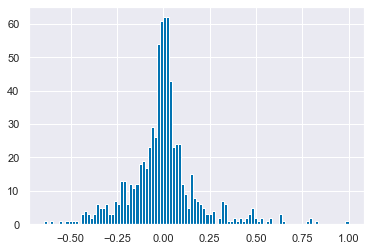

In [249]:
corrs.hist(bins=100)

In [258]:
corrs[corrs.abs()>.5].sort_values().tail(10)

dealPriorityRedTape__Extremely important    0.582385
al4__Strongly agree                         0.628310
immigrantsWelfareState__Strongly agree      0.634510
govtHandouts__Strongly agree                0.635757
dealPriorityImmig__Extremely important      0.640230
al3__Strongly agree                         0.783903
al2__Strongly agree                         0.790263
al5__Strongly agree                         0.800879
al1__Strongly agree                         0.819360
al_scale__Authoritarian                     1.000000
dtype: float64

['likeJohnson__Strongly like',
 'likeStarmer__Strongly like',
 'likeDavey__Strongly like',
 'likeSturgeon__Strongly like',
 'likeFarage__Strongly like',
 'likeBartley__Strongly like',
 'likeBerry__Strongly like',
 'likeCon__Strongly like',
 'likeLab__Strongly like',
 'likeLD__Strongly like',
 'likeSNP__Strongly like',
 'likePC__Strongly like',
 'likeBrexitParty__Strongly like',
 'likeGrn__Strongly like',
 'EUIntegrationSelf__Protect our independence',
 'immigEcon__Good for economy',
 'immigCultural__Enriches cultural life',
 'euPriorityBalance__Control immigration',
 'handleCorona__Very well',
 'handleCoronaLab__Very well',
 'govtHandlelockdown__Very well',
 'govtHandlePPE__Very well',
 'govtHandleTesting__Very well',
 'changeNHS__Getting a lot better',
 'changeEconomyLab__Getting a lot better',
 'changeNHSLab__Getting a lot better',
 'ptvCon__Very likely',
 'ptvLab__Very likely',
 'ptvLD__Very likely',
 'ptvSNP__Very likely',
 'ptvPC__Very likely',
 'ptvBrexitParty__Very likely',
 'pt

In [260]:
high_correlation_corrs

['likeJohnson__Strongly like',
 'likeStarmer__Strongly like',
 'likeDavey__Strongly like',
 'likeSturgeon__Strongly like',
 'likeFarage__Strongly like',
 'likeBartley__Strongly like',
 'likeBerry__Strongly like',
 'likeCon__Strongly like',
 'likeLab__Strongly like',
 'likeLD__Strongly like',
 'likeSNP__Strongly like',
 'likePC__Strongly like',
 'likeBrexitParty__Strongly like',
 'likeGrn__Strongly like',
 'EUIntegrationSelf__Protect our independence',
 'immigEcon__Good for economy',
 'immigCultural__Enriches cultural life',
 'euPriorityBalance__Control immigration',
 'handleCorona__Very well',
 'handleCoronaLab__Very well',
 'govtHandlelockdown__Very well',
 'govtHandlePPE__Very well',
 'govtHandleTesting__Very well',
 'changeNHS__Getting a lot better',
 'changeEconomyLab__Getting a lot better',
 'changeNHSLab__Getting a lot better',
 'ptvCon__Very likely',
 'ptvLab__Very likely',
 'ptvLD__Very likely',
 'ptvSNP__Very likely',
 'ptvPC__Very likely',
 'ptvBrexitParty__Very likely',
 'pt

In [282]:
gender_gap.sort_values()

benchCoronaKorea__Very good                   -5.706173
age                                           -2.889029
benchCoronaGermany__Very good                 -1.276736
benchCoronaUSA__Very good                     -1.055726
polAttention__Pay a great deal of attention   -0.843130
                                                 ...   
gender_Female                                  1.000000
likeSturgeon__Strongly like                    1.080234
benchCoronaUK__Very good                       2.648001
benchCoronaSweden__Very good                   3.864810
benchCoronaItaly__Very good                    4.376520
Length: 742, dtype: float64

In [293]:
gender_gap.drop('gender_Female')

turnoutUKGeneral__Very likely that I will vote   -0.023054
partyIdStrength__Not very strong                  0.035608
polAttention__Pay a great deal of attention      -0.084313
pidWeThey__Strongly agree                        -0.052842
pidInterestedOthers__Strongly agree              -0.002155
                                                    ...   
responsibleEconC_2_Yes                           -0.004656
responsibleEconC_1_Yes                           -0.065377
coronaMeasures_2_Yes                              0.044327
coronaMeasures_1_Yes                             -0.002246
coronaMeasures_4_Yes                              0.018628
Length: 741, dtype: float64

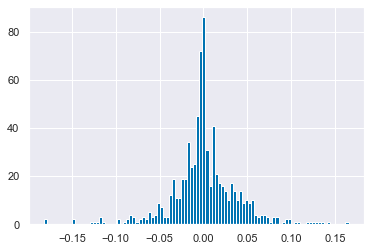

In [294]:
gender_gap.drop('gender_Female').hist(bins=100)

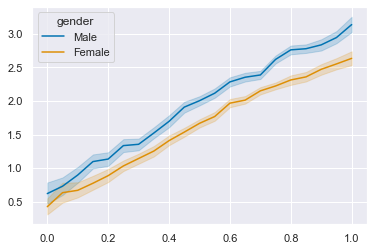

In [47]:
sns.lineplot(x=authoritarianism, y=gayEquality, hue=df["gender"])

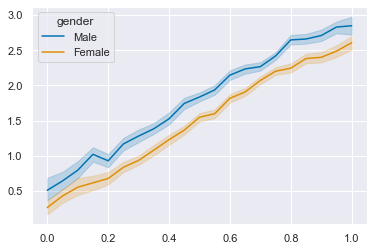

In [56]:
sns.lineplot(x=authoritarianism, y=blackEquality, hue=df["gender"])

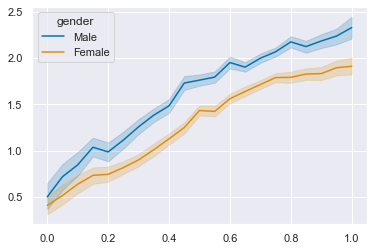

In [57]:
sns.lineplot(x=authoritarianism, y=femaleEquality, hue=df["gender"])

In [54]:

search(df,"Equality")

scotIndepInequalityW1         5896
inequalityChangeW2           30260
inequalityChangeLargerW2     23229
inequalityChangeSmallerW2     1444
inequalityGoodBadW2          30262
                             ...  
femaleEqualityW1_W5          41876
gayEqualityW1_W5             41876
blackEqualityW6_W14          63222
femaleEqualityW6_W14         63748
gayEqualityW6_W14            63222
Length: 62, dtype: int64

In [ ]:
### how about other minorities?

In [49]:
search(df,"embes|p_")

partyContactUKIP_1W1      235
partyContactUKIP_2W1      235
partyContactUKIP_3W1      235
partyContactUKIP_4W1      235
partyContactUKIP_5W1      235
                        ...  
p_edlevelUniW21         28158
p_edlevelUniW8          29010
p_edlevelUniW17         31102
p_edlevelUniW18         23054
p_eurefturnout          91315
Length: 700, dtype: int64

In [51]:
df["p_sexualityW23"].value_counts()

Heterosexual         27207
Prefer not to say     1137
Gay or lesbian        1094
Bisexual              1084
Other                  371
Name: p_sexualityW23, dtype: int64

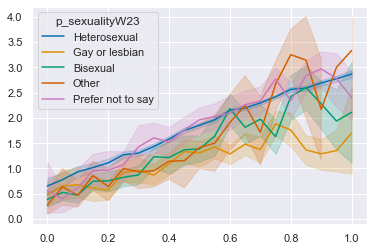

In [52]:
sns.lineplot(x=authoritarianism, y=gayEquality, hue=df["p_sexualityW23"])

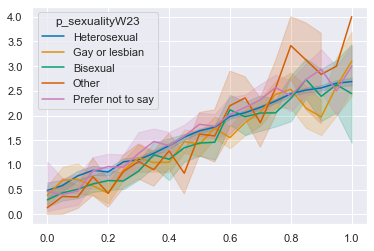

In [58]:
sns.lineplot(x=authoritarianism, y=blackEquality, hue=df["p_sexualityW23"])

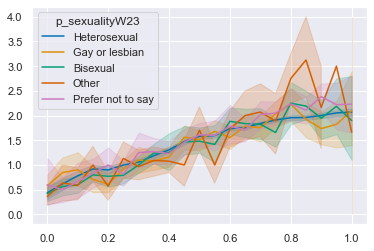

In [59]:
sns.lineplot(x=authoritarianism, y=femaleEquality, hue=df["p_sexualityW23"])

In [73]:
het_or_not = df["p_sexualityW23"]=="Heterosexual"
het_or_not[df["p_sexualityW23"].isnull()]=np.nan
het_or_not.value_counts(dropna=False)

NaN    76903
1.0    27207
0.0     3686
Name: p_sexualityW23, dtype: int64

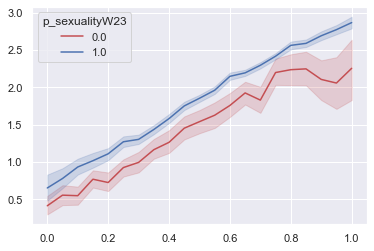

In [76]:
sns.lineplot(x=authoritarianism, y=gayEquality, hue=het_or_not,palette={0:'r',1:'b'})

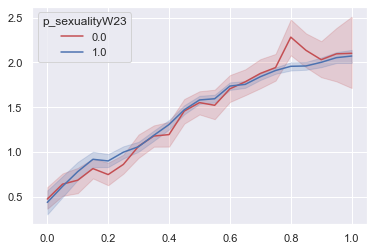

In [77]:
sns.lineplot(x=authoritarianism, y=femaleEquality, hue=het_or_not,palette={0:'r',1:'b'})

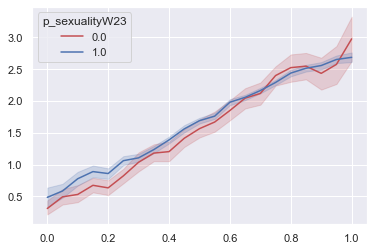

In [78]:
sns.lineplot(x=authoritarianism, y=blackEquality, hue=het_or_not,palette={0:'r',1:'b'})

In [81]:
df["p_religionW23"].value_counts()

def get_rel_minority(x):
    if x =="No, I do not regard myself as belonging to any particular religion.":
        return "Nonreligious"
    elif x =="Yes - Church of England/Anglican/Episcopal":
        return "CofE"
    elif x =="Yes - Roman Catholic":
        return "Catholic"
    elif x =="Prefer not to say":
        return "Prefer not to say"    
    elif pd.isnull(x):
        return np.nan
    else:
        return "Rel Minority"
    
df["p_religionW23"].apply(get_rel_minority).value_counts()

Nonreligious         15851
CofE                  7769
Rel Minority          4127
Catholic              2139
Prefer not to say      807
Name: p_religionW23, dtype: int64

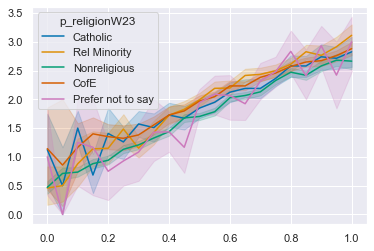

In [82]:
sns.lineplot(x=authoritarianism, y=gayEquality, hue=df["p_religionW23"].apply(get_rel_minority))

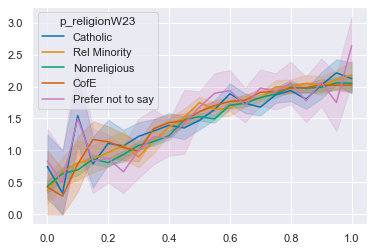

In [83]:
sns.lineplot(x=authoritarianism, y=femaleEquality, hue=df["p_religionW23"].apply(get_rel_minority))

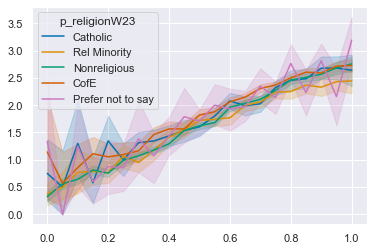

In [84]:
sns.lineplot(x=authoritarianism, y=blackEquality, hue=df["p_religionW23"].apply(get_rel_minority))

In [87]:
df["p_ethnicityW23"].value_counts()

whiteBrit_or_not = df["p_ethnicityW23"]=="White British"
whiteBrit_or_not[df["p_ethnicityW23"].isnull()]=np.nan
whiteBrit_or_not.value_counts(dropna=False)

NaN    78397
1.0    26243
0.0     3156
Name: p_ethnicityW23, dtype: int64

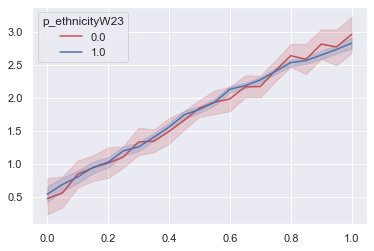

In [91]:
sns.lineplot(x=authoritarianism, y=gayEquality, hue=whiteBrit_or_not,palette={0:'r',1:'b'})

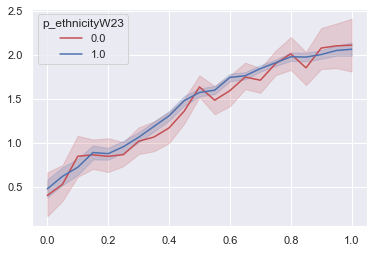

In [92]:
sns.lineplot(x=authoritarianism, y=femaleEquality, hue=whiteBrit_or_not,palette={0:'r',1:'b'})

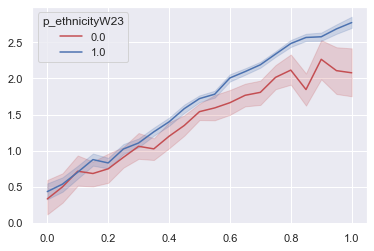

In [93]:
sns.lineplot(x=authoritarianism, y=blackEquality, hue=whiteBrit_or_not,palette={0:'r',1:'b'})

In [94]:
## p_parent, p_disability

In [96]:
df["p_parentW23"].value_counts()

Yes    17808
No     11743
Name: p_parentW23, dtype: int64

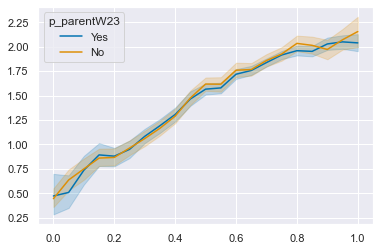

In [97]:
sns.lineplot(x=authoritarianism, y=femaleEquality, hue=df["p_parentW23"])

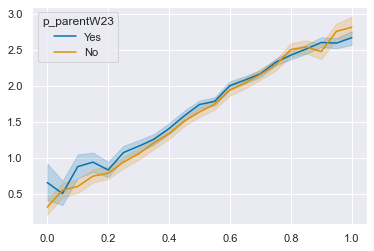

In [98]:
sns.lineplot(x=authoritarianism, y=blackEquality, hue=df["p_parentW23"])

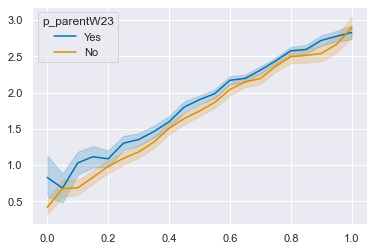

In [99]:
sns.lineplot(x=authoritarianism, y=gayEquality, hue=df["p_parentW23"])

In [106]:
femaleEquality.notnull().sum(),gayEquality.notnull().sum(),blackEquality.notnull().sum()

(28589, 27432, 27659)

In [108]:
df["p_disabilityW23"].value_counts()

No                       21440
Yes, limited a little     5917
Yes, limited a lot        3208
Name: p_disabilityW23, dtype: int64

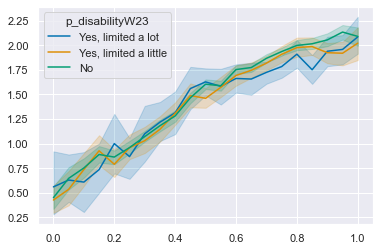

In [109]:
sns.lineplot(x=authoritarianism, y=femaleEquality, hue=df["p_disabilityW23"])

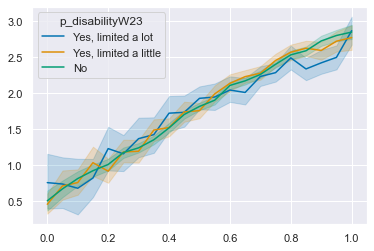

In [110]:
sns.lineplot(x=authoritarianism, y=gayEquality, hue=df["p_disabilityW23"])

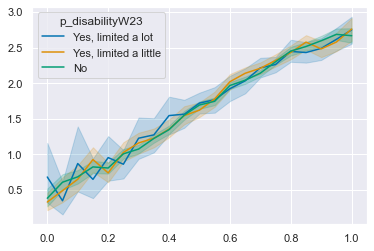

In [111]:
sns.lineplot(x=authoritarianism, y=blackEquality, hue=df["p_disabilityW23"])

In [113]:
not_disabled_at_all = df["p_disabilityW23"]=="No"
not_disabled_at_all[  df["p_disabilityW23"].isnull() ]=np.nan
not_disabled_at_all.value_counts(dropna=False)

NaN    77231
1.0    21440
0.0     9125
Name: p_disabilityW23, dtype: int64

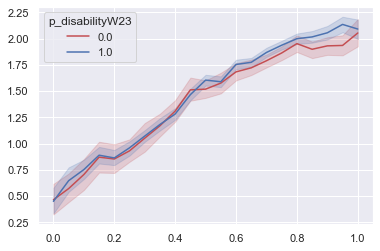

In [114]:
sns.lineplot(x=authoritarianism, y=femaleEquality, hue=not_disabled_at_all,palette={0:'r',1:'b'})

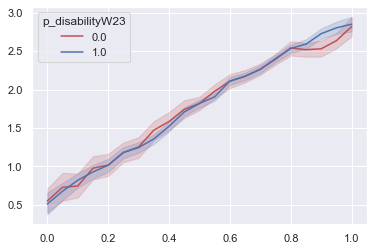

In [115]:
sns.lineplot(x=authoritarianism, y=gayEquality, hue=not_disabled_at_all,palette={0:'r',1:'b'})

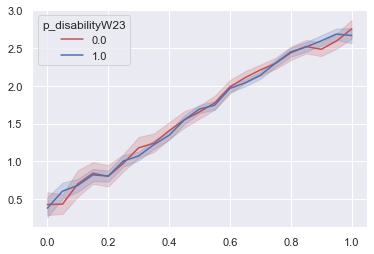

In [116]:
sns.lineplot(x=authoritarianism, y=blackEquality, hue=not_disabled_at_all,palette={0:'r',1:'b'})

In [372]:
search(BES_reduced_with_na,"Farage|al2")

likeFarage__Strongly like    29778
al2__Strongly agree          29498
dtype: int64

In [374]:
BES_reduced_with_na["likeFarage__Strongly like"].groupby(BES_reduced_with_na["al2__Strongly agree"]).mean()

al2__Strongly agree
0.0    0.961051
1.0    1.979009
2.0    3.049005
3.0    3.688448
4.0    4.719222
Name: likeFarage__Strongly like, dtype: float32

In [376]:
BES_reduced_with_na["al2__Strongly agree"].value_counts(normalize=True).sort_index()

0.0    0.271171
1.0    0.148552
2.0    0.119364
3.0    0.230049
4.0    0.230863
Name: al2__Strongly agree, dtype: float64

In [54]:
### do we have enough data to see change in al_values over time?
search(BES_reduced_with_na,"al1")

al1W6__Strongly agree                                                                           29014
al1W13__Strongly agree                                                                          29463
sdoantiegal1W15__Strongly favour                                                                 6146
al1W16__Strongly agree                                                                          35590
al1W17__Strongly agree                                                                          32277
al1W1_W5__Strongly agree                                                                        40147
al1W14W15__Strongly agree                                                                       34158
al1W7_W9__Strongly agree                                                                        37943
al1W10_W12__Strongly agree                                                                      32606
incremental1W19_Established traditions provide the wisdom necessary to understand 

In [55]:
search(BES_reduced_with_na,"al_scale")

al_scaleW1_W5__Authoritarian      37890
al_scaleW6__Authoritarian         27288
al_scaleW7_W9__Authoritarian      35873
al_scaleW10_W12__Authoritarian    30088
al_scaleW13__Authoritarian        27253
al_scaleW14W15__Authoritarian     31629
al_scaleW16__Authoritarian        32671
al_scaleW17__Authoritarian        29773
dtype: int64

In [ ]:
# al_scaleW1_W5__Authoritarian 2014-2015
# to 
# al_scaleW17__Authoritarian 2019 - 4 years min

# best you could would be 2014 - 2022 - 8 years min


# check quickly, otherwise it's
# *go find a longitudinal dataset
# *use BESf2f and hope sample is good enough to see gen diffs